<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?# A:

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

# Solution Report

### Aim
**1. Estimating the value of homes from fixed characteristics.**

**2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones**

**3. What property characteristics predict an "abnormal" sale?**



### Approach Guide

    1. Understanding the Data
    2. Initial Data Cleaning
    
        2.1 Numerical Features
            2.1.1 Dealing with Missing Values (numeric)
            2.1.2 Multicollinearity (numeric)
            2.1.3 Impute Missing Values (numeric)
            2.1.4 Initial EDA (numeric)
        2.2 Categorical Features
            2.2.1 Dealing with Missing Values (Categorical)
            2.2.2 Impute Missing values (Categorical)
            2.2.3. Initial EDA (categorical)
                2.2.3.1. One Hot encoding for qualitative categorical
                2.2.3.2. EDA on qualitative categorical
                2.2.3.3. EDA on ordinal categorical
    3. Data Preparation
        3.1. Bringing all features back together
        3.2. Removing non-residential records
        3.3. Dividing Dataframes into fixed characteristics & Renovatable characteristics

    4. Prediction Model for Fixed Characteristics
        4.1 XGBoost
        4.2 Multiple Linear Regression

    5. Prediction Model for Renovatable Characteristics
        5.1 XGBoost
        5.2 Multiple Linear Regression
   
    
- [Understanding the Data](#understanding)
- [Initial Analysis](#initial)
- [Problem Solving Approach](#approach)
- [EDA Part 1](#eda1)
- [Data Cleaning part 1](#cleaning1)
- [EDA Part 2](#eda2)
- [Feature Engineering](#feature_engineering)
- [Regularization](#regularization)
- [Problem 1:Estimating the value of homes from fixed characteristics ](#problem1)
- [Problem 2:Determine any value of *renovatable* property characteristics unexplained by the *fixed* ones. ](#problem2)
- [Problem 3:What property characteristics predict an "abnormal" sale](#problem3)

# 1. Understanding the data

In [1]:
## import libraries
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

##for prediction model & encoding
import xgboost as xgb
import operator

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import sklearn.linear_model as ln
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer,r2_score
from scipy.stats import skew
from IPython.display import display

sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/Users/hernandoren/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#load data
house = pd.read_csv('./housing.csv')

In [3]:
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
describe = house.describe(include=['O'])
describe

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1460         1460       1460      ...            1379   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1382          225       1260      ...             870   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1379       1379       1379       1460      7    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Gd  MnPrv   
freq            605       1311       1326       1340      3    157   

       MiscFeature SaleType SaleCondition  
count           54     1460          1460  
unique           4        9             6  
top           Shed       WD        Normal  
freq            49     1267          1198  

[4 rows x 43 columns]

This housing data has 1460 observations and 81 variables with SalePrice and SaleCondition as the target variable.
SalePrice will be the target variable for problem 1 and problem 2, and SaleCondition will be target variable for problem 3. 

obviously that 1460 record with 81 variables are too much variable and may lead into overfitting.and we need to reduce the variables.


### Issues within the data

#### **Data Type**
we can see that out of 79 variable features, 43 of them are object data type and the rest are integer. 
first we will divide the dataframe into integer features and categorical features and do data cleaning separatedly (both will have SalePrice variable as target variable)

for integer variables we will deal with the missing data, multicollinearity between int variables and impute null values,the conduct eda for int features

for categorical data 
we can divide these object datatype variable into 2 type:
**nominal categorical** data and **ordinal categorical** data. 
- Nq example : Foundation -> type of foundation: Brick&tile, cinder block, slab, stone, wood
- Oq example : Basement condition ->  Excellent, good, typical, fair, poor, no basement

first we will deal with nominal categorical data, and do We will do **label encoding**: e.g (5,4,3,2,1) for variable with ranking qualitative from excellent to poor or zero. after that we will conduct EDA on these set.

But for the ordinal qualitative, we will do **One Hot Encoding** to the variables on the model prediction stage, to make the process less messy. before that we will only conduct EDA on these set as well.

#### **Missing Values**
we will remove variables which have missing more than 45%
when we read the variable descriptions, we can say that most of NaN information means thatn the house doesnt have that particular feature or facility, in that sense we can replace NA with 0.

####  Removing Non-residential data Record
we will do this after we combine back the numeric and categorical variables


## 2. Initial Data Cleaning

### 2.1 Numerical Features

In [6]:
## Create dataframe only for numerical features
int_df = house.select_dtypes(include=['Int64','float64']).copy()
int_df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1    ...      WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706    ...               0           61   
1          1976         0.0         978    ...             298            0   
2          2002       162.0         486    ...               0           42   
3          1970         0.0         216    ...               0           35   
4          2000       350.0         655    ...             192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

#### 2.1.1 Dealing with Missing Values (Numeric)

In [7]:
## Checking the percentage of integer Null values , 1460 is the number of record
int_null= int_df.isnull().sum()/1460
int_null.sort_values(ascending=False)[0:6]

LotFrontage     0.177397
GarageYrBlt     0.055479
MasVnrArea      0.005479
BsmtFinSF1      0.000000
LowQualFinSF    0.000000
2ndFlrSF        0.000000
dtype: float64



Numeric variables has mostly filled values. we will check the **Lot Frontage** scatter plot compared with price, whether it's worth to do imputing method for it.

 #LotFrontage: Linear feet of street connected to property

Text(0.5,1,u'Relationship between Linear feet of street connected to property and Sale Price')

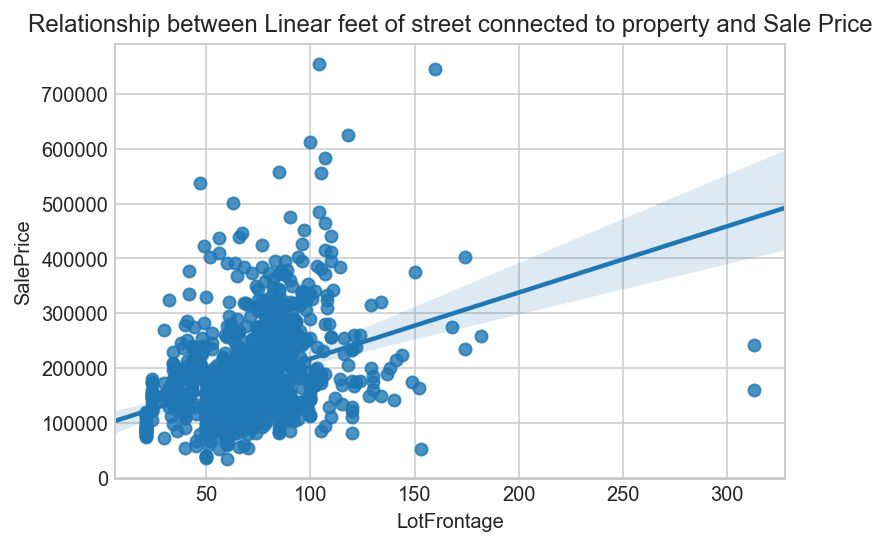

In [8]:
sns.regplot(x="LotFrontage", y="SalePrice", data=int_df );
plt.title("Relationship between Linear feet of street connected to property and Sale Price")

it seems lot frontage has some positive correlation within the sale price, then we will keep it for now.

### 2.1.2 Multicollinearity (Numeric)

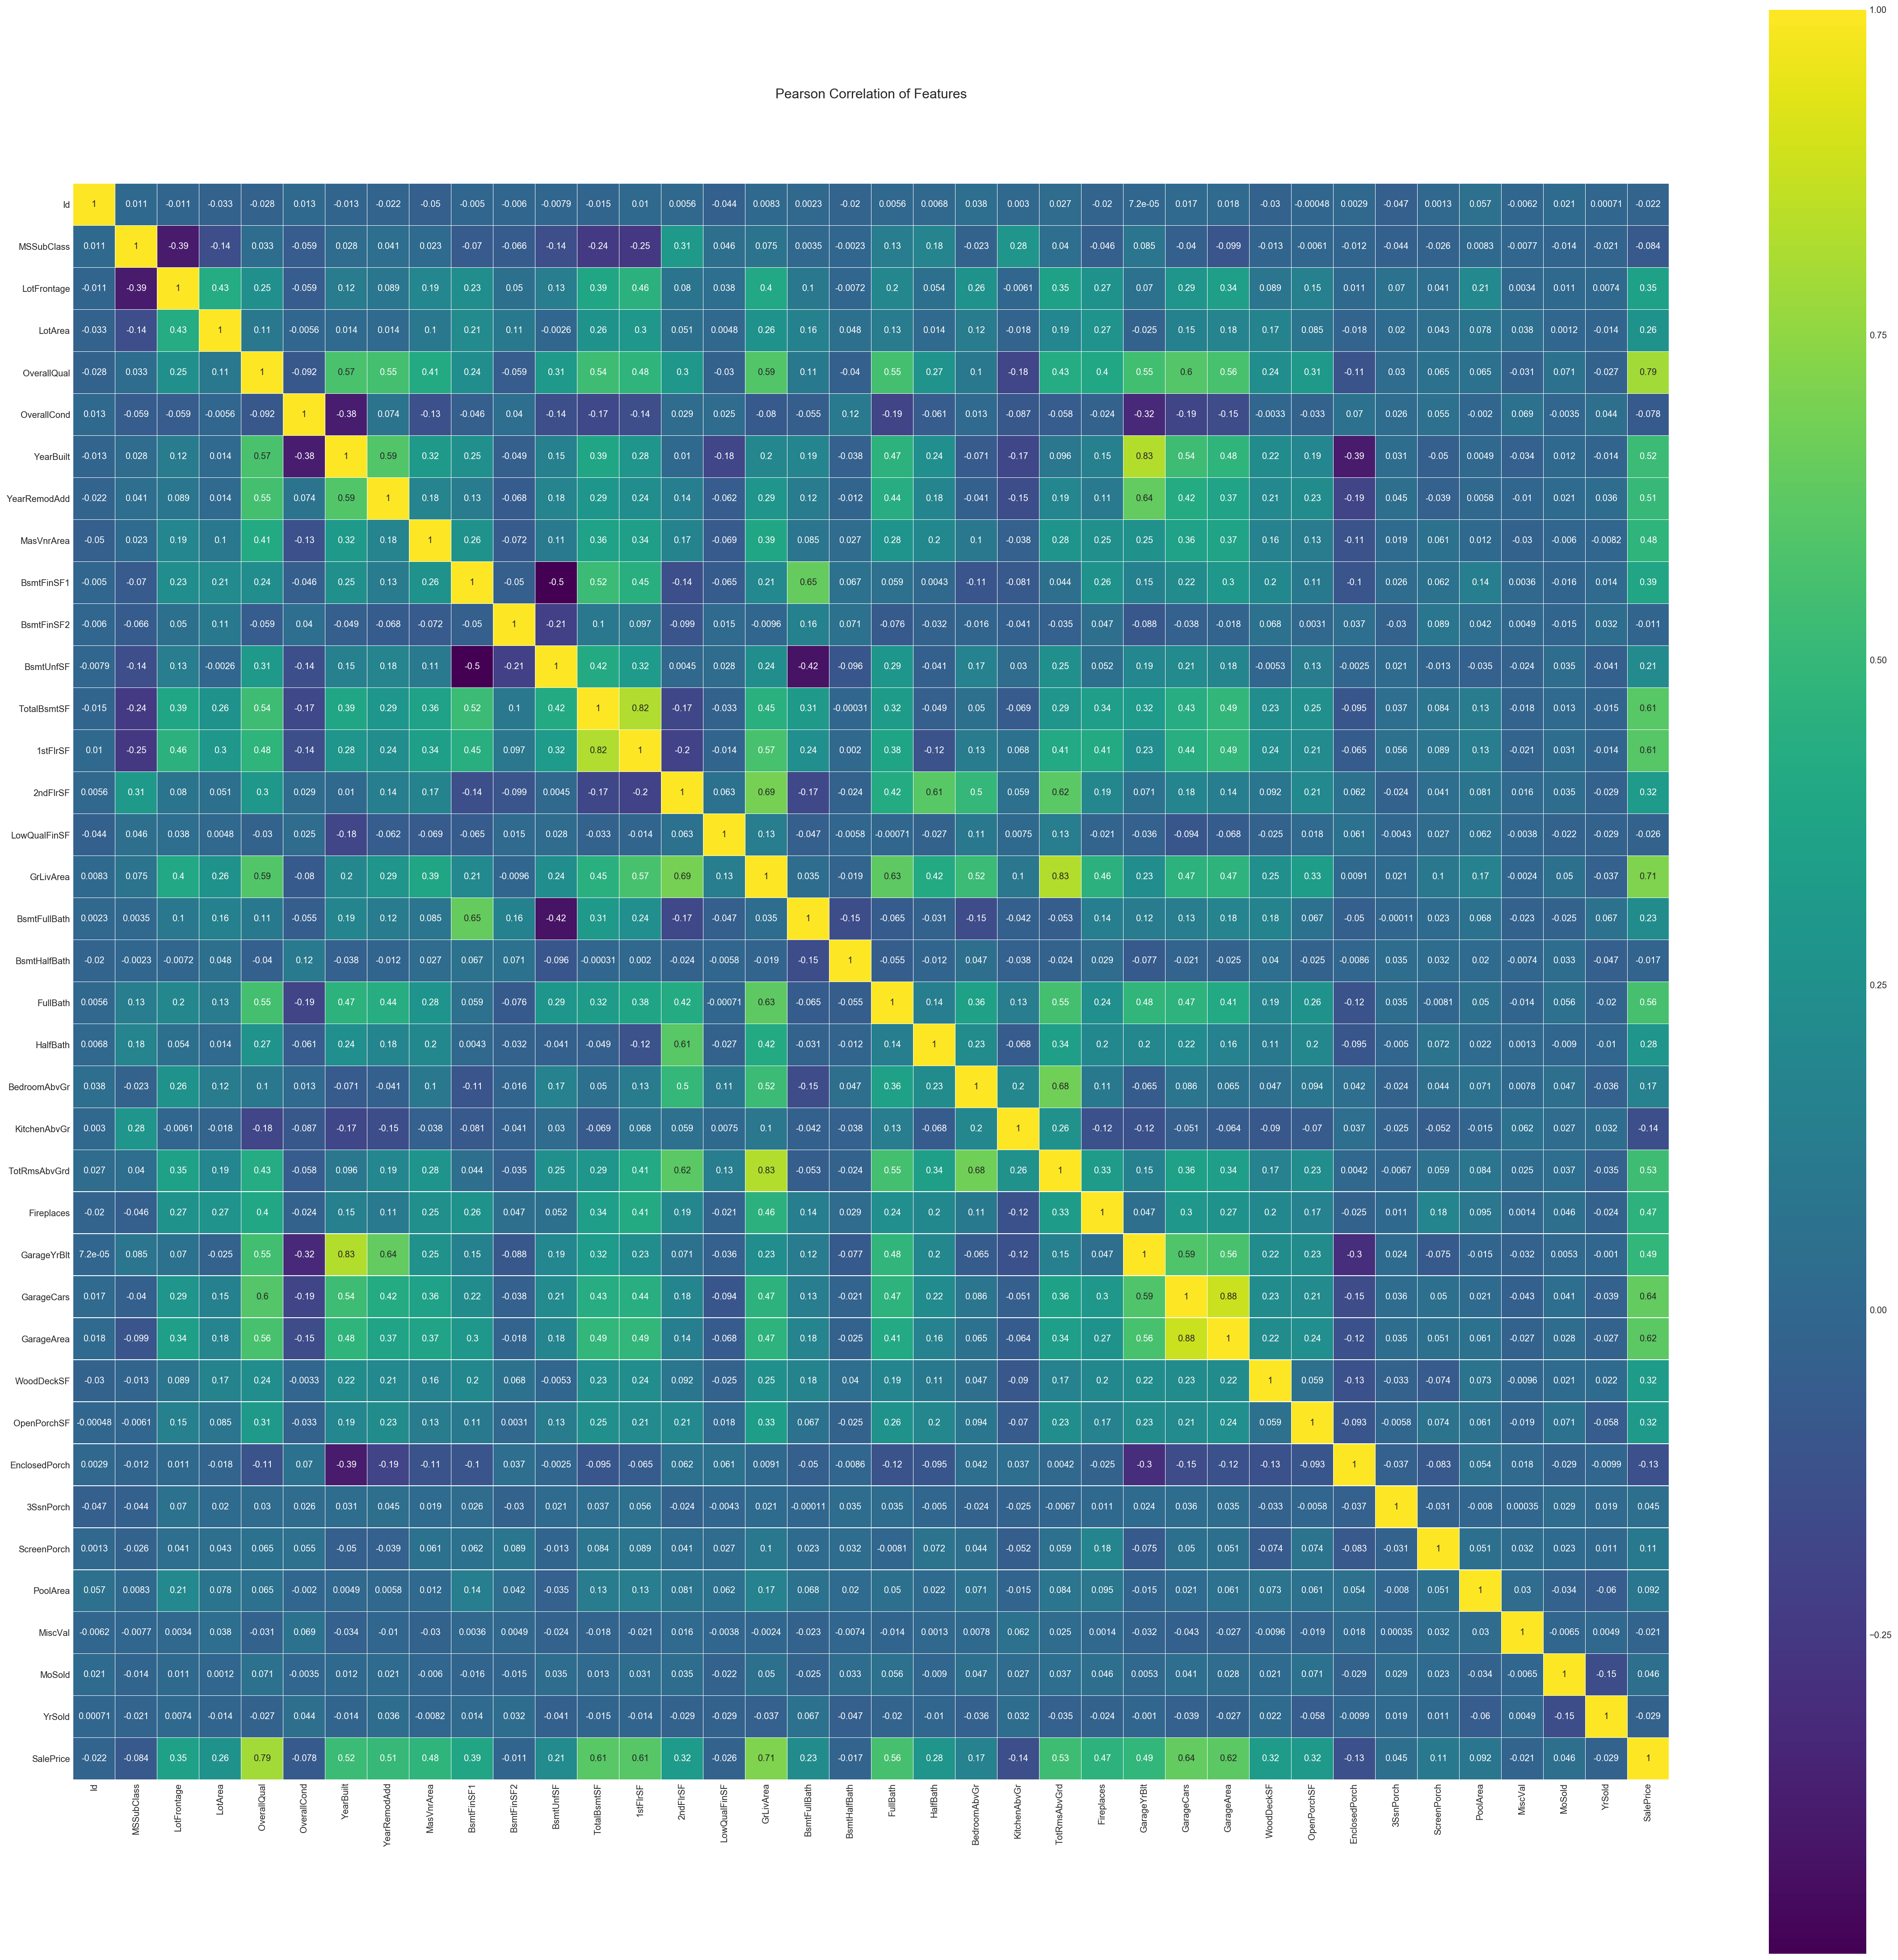

In [9]:
#Checking The correlation for multicollinearity purpose
##doubleclick to see the image
colormap = plt.cm.viridis
_=plt.figure(figsize=(40,40))
_=plt.title('Pearson Correlation of Features', y=1.05, size=15)
_=sns.heatmap(int_df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [10]:
# Create correlation dataframe
corr_df = int_df.corr()

# Create a dataframe for the SalePrice correlation only
sale_price_df = corr_df["SalePrice"]
sale_price_df

# Remove references to any SalePrice column or row in correlation dataframe
corr_df = corr_df.drop('SalePrice', 1)
corr_df = corr_df.drop(['SalePrice'])


# Filter through correlations to find correlation sets greater than the significant correlation value (scv)
def find_all_correlations_of_interest(df, scv):
    all_lists = []
    for column, series in df.iteritems():
        for item_in_series in series.iteritems():
            variable, value = item_in_series
            if ((value >= scv) or (value <= -(scv))) and (value != 1):
                correlation = [column, variable]
                correlation.sort()
                correlation.append(value)
                all_lists.append(correlation)
    return all_lists
            
            
# Function to remove duplicate duplication correlation sets
def return_only_unique_correlations(list_with_duplicates):
    output = []
    for item in list_with_duplicates:
        if item not in output:
            output.append(item)
    return output


# Function to check the multicollinearity against the sales price
def multicollinearity_correlations_against_y_corr(unique_corr, y_corr):
    for items in unique_corr:
        column_sp_corr = y_corr[items[0]]
        variable_sp_corr = y_corr[items[1]]
        if column_sp_corr < variable_sp_corr:
            eliminate_variable = items[0]
        else:
            eliminate_variable = items[1]
        print items, '-> eliminate', eliminate_variable


# Function to check sale price correlations of significant correlation values 
def check_correlations_against_y_corr_only(df, scv):
    for key, value in df.iteritems():
        if ((value >= scv) or (value <= -(scv))) and value != 1 :
            print key, value

            
print "========== Multicollinearity Correlations Against Sales Price =========="
correlations_of_interest = find_all_correlations_of_interest(corr_df, 0.68)
unique_correlations = return_only_unique_correlations(correlations_of_interest)    
multicollinearity_correlations_against_y_corr(unique_correlations, sale_price_df) 
print ""    
print "========== SalesPrice Correlations Only ======="
check_correlations_against_y_corr_only(sale_price_df, 0.68)

========== Multicollinearity Correlations Against Sales Price ==========
['GarageYrBlt', 'YearBuilt', 0.82566748417434344] -> eliminate GarageYrBlt
['1stFlrSF', 'TotalBsmtSF', 0.81952997500503555] -> eliminate 1stFlrSF
['2ndFlrSF', 'GrLivArea', 0.68750106416660084] -> eliminate 2ndFlrSF
['GrLivArea', 'TotRmsAbvGrd', 0.82548937430883773] -> eliminate TotRmsAbvGrd
['GarageArea', 'GarageCars', 0.88247541428146026] -> eliminate GarageArea

========== SalesPrice Correlations Only =======
OverallQual 0.790981600584
GrLivArea 0.708624477613


just as initial eda, we are taking a look on correlation between integer variables with sale price. just to take a look which variables that we might want to take a look more.

<img src="https://i.imgur.com/dQIf7eu.png" style="float: left">
<img src="https://image.ibb.co/kYtWsm/Screen_Shot_2017_11_23_at_9_56_44_am.png" style="float: left">


My method is by looking at the highly correlated variables to sale price, and check whether they have multicollinearity with other variables, and drop the weaker predictor of SalePrice variables

Int Variables which has high multicollinearity (>=0.68):

1. 1stFlrSF with TotalBsmtSF -> 0.82. Eliminate TotalBsmtSF
2. YearBuilt with GarageYrBlt -> 0.83 Eliminate GarageYrBlt
3. GrLivArea with TotRmsAbvGrd -> 0.68 Eliminate TotRmsAbvGrd 
4. GarageCars with GarageArea -> 0.88 Eliminate GarageArea
5. GrLivArea with 2ndFlrSF -> 0.69 Eliminate 2ndFlrSF

In [11]:
# Drop features with high multicollinearity
int_df.drop(['TotalBsmtSF','GarageYrBlt','TotRmsAbvGrd','GarageArea','2ndFlrSF'], axis=1, inplace=True)

### 2.1.3 Impute Missing Values (numeric)

In [12]:
## Checking the percentage of integer Null values , 1460 is the number of record
int_null= int_df.isnull().sum()/1460
int_null.sort_values(ascending=False)[0:6]

LotFrontage     0.177397
MasVnrArea      0.005479
SalePrice       0.000000
BsmtFullBath    0.000000
MSSubClass      0.000000
LotArea         0.000000
dtype: float64

In [13]:
##impute LotFrontage and MasVnrArea as zero
int_df.fillna(0, inplace=True)

All Numeric variables are cleaned now~!

### 2.1.4 Initial EDA (Numeric)

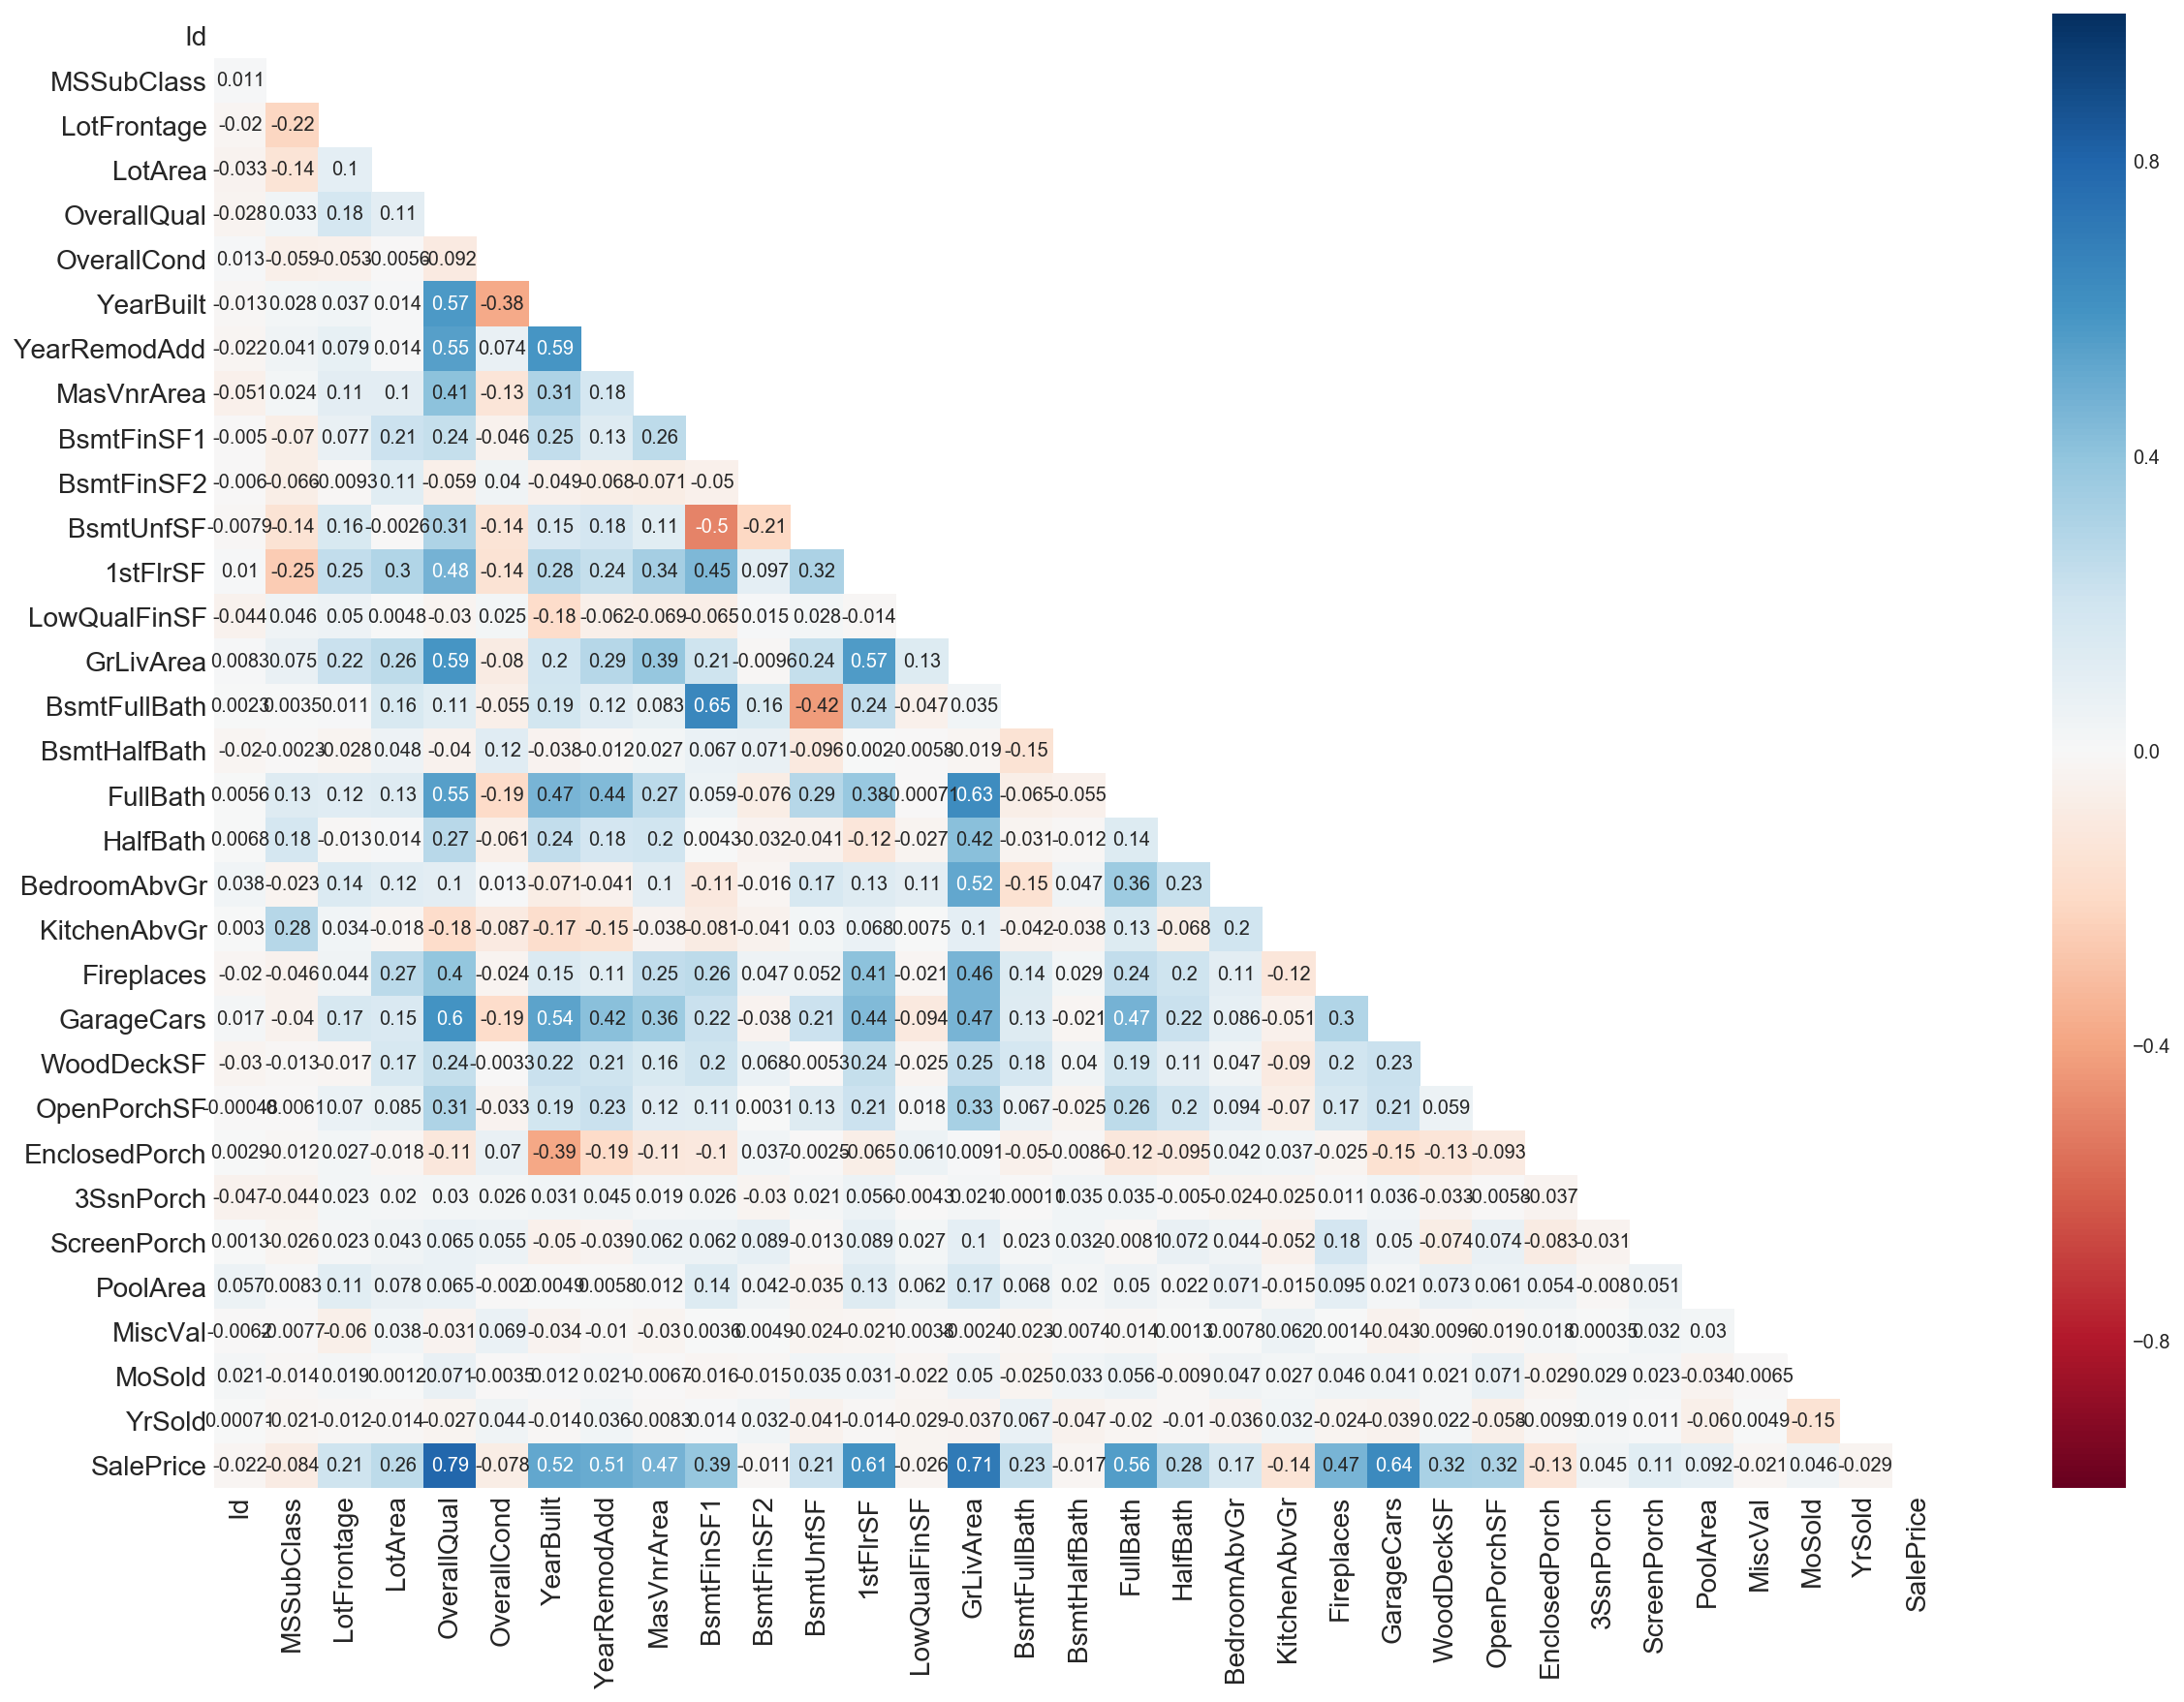

In [14]:
# change df to your DataFrame name. if needed, drop columns here.
mean_corr = int_df.corr()
# Set the default matplotlib figure size to 20x14 OR WHATEVER.
fix, ax = plt.subplots(figsize=(20,14))
# Generate a mask for the upper triangle(taken from seaborn example gallery)
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, mask=mask, ax=ax, annot=True, cmap='RdBu', vmin=-1, vmax=1)
# Resize and rotate the labels
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()


Top 5 integer variables that highly correlated with SalePrice :
- OverallQual = 0.79
- GrLivArea = 0.71
- GarageCars = 0.64
- 1stFlrSF = 0.64
- YearBuilt = 0.52

these makes sense, since when we take a look at a house, we might want to consider its overall quality, Above grade (ground) living area square feet, how many car can fit the garage, first floor square feet, and year its built. The coicidence is actually all 5 can be described as  **Fixed Feature** of the house, which can't do quick renovation to improve it. OverallQual is arguable renovatable variable, but since we focus on quick fix. I will include overall quality of a house as fixed features.

## 2.2 CATEGORICAL Features

### 2.2.1 Missing Values Categorical

In [15]:
obj_df = house.select_dtypes(include=['object']).copy()
obj_df.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1      ...      GarageType GarageFinish GarageQual  \
0      CollgCr       Norm      ...          Attchd          RFn         TA   
1      Veenker      Feedr      ...          Attchd          RFn         TA   
2      CollgCr       Norm      ...          Attchd          RFn         TA   
3      Crawfor       Norm      ...          Detchd          Unf         TA   
4      NoRidge       Norm      ...          Attchd          RFn         TA   

  GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0         TA          Y    NaN   NaN         NaN       WD        Normal  
1         TA          Y    NaN   NaN         NaN       WD        Normal  
2         TA          Y    NaN   NaN         NaN       WD        Normal  
3         TA          Y    NaN   NaN         NaN       WD       Abnorml  
4         TA          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [16]:
## Checking the percentage of Null values , 1460 is the number of record
obj_null= obj_df.isnull().sum()/1460
obj_null.sort_values(ascending=False)[0:17]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtQual        0.025342
BsmtCond        0.025342
MasVnrType      0.005479
Electrical      0.000685
Condition2      0.000000
dtype: float64

 So we will drop all variables missing values over 45%, and impute the rest. 

In [17]:
# drop variables >45% missing values
obj_df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)

### 2.2.2 Impute Missing values (Categorical)

If we take a look on the description of the data, categorical variables with missing values NA means that they don't have the feature. the null values relagted with garage, basement, veneer, and Electrical. all NA means No garage, No Basement etc. 

Here I will impute these variable with 'Zero' record    

In [18]:
## Fill categorical NA with string "Zero"
obj_df.fillna("Zero", inplace=True)

In [19]:
## Checking the percentage of categorical Null values , 1460 is the number of record
obj_null= obj_df.isnull().sum()/1460
obj_null.sort_values(ascending=False)[0:5]

SaleCondition    0.0
Condition2       0.0
MasVnrType       0.0
Exterior2nd      0.0
Exterior1st      0.0
dtype: float64

All Integer variables are cleaned now~!

### 2.2.3. Initial EDA (categorical)
           

In [20]:
obj_df.columns

Index([u'MSZoning', u'Street', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'ExterQual',
       u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinType1', u'BsmtFinType2', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'KitchenQual', u'Functional',
       u'GarageType', u'GarageFinish', u'GarageQual', u'GarageCond',
       u'PavedDrive', u'SaleType', u'SaleCondition'],
      dtype='object')

#### Dividing categorical into nominal and ordinal 

Nominal Qualitative (One Hot Encoding) :
'MSZoning', 'Street' ,'LotShape','LandContour','LotConfig','Neighborhood', 'Condition1',
'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType','Foundation','Heating','Electrical', 'GarageType', 'PavedDrive','SaleType','SaleCondition'

Ordinal Qualitative (Label Encoding): 
'Utilities','LandSlope','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual','Functional','GarageFinish','GarageQual','GarageCond'

In [21]:
nom_var = ['MSZoning', 'Street' ,'LotShape','LandContour','LotConfig','Neighborhood',
           'Condition1','Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
           'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType','Foundation',
           'Heating','Electrical', 'GarageType', 'PavedDrive']


ord_var =['Utilities','LandSlope','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
          'BsmtExposure','BsmtFinType1','BsmtFinType2', 'HeatingQC', 'CentralAir', 
          'KitchenQual','Functional','GarageFinish','GarageQual','GarageCond']

##### 2.2.3.1. One Hot encoding for qualitative categorical

In [22]:
#Label Encoding ordinal variables
for x in ord_var :
    obj_df[x] = obj_df[x].astype('category')
    obj_df[x] = obj_df[x].cat.codes

In [23]:
#Add SalePrice feature fto the dataframe to further EDA
new_ord_var= pd.concat([obj_df, int_df['SalePrice'].reset_index(drop=True)], axis=1)
new_ord_var.head()



MSZoning Street LotShape LandContour  Utilities LotConfig  LandSlope  \
0       RL   Pave      Reg         Lvl          0    Inside          0   
1       RL   Pave      Reg         Lvl          0       FR2          0   
2       RL   Pave      IR1         Lvl          0    Inside          0   
3       RL   Pave      IR1         Lvl          0    Corner          0   
4       RL   Pave      IR1         Lvl          0       FR2          0   

  Neighborhood Condition1 Condition2    ...    KitchenQual Functional  \
0      CollgCr       Norm       Norm    ...              2          6   
1      Veenker      Feedr       Norm    ...              3          6   
2      CollgCr       Norm       Norm    ...              2          6   
3      Crawfor       Norm       Norm    ...              2          6   
4      NoRidge       Norm       Norm    ...              2          6   

  GarageType GarageFinish GarageQual GarageCond PavedDrive  SaleType  \
0     Attchd            1          4          4          Y        WD   
1     Attchd            1          4          4          Y        WD   
2     Attchd            1          4          4          Y        WD   
3     Detchd            2          4          4          Y        WD   
4     Attchd            1          4          4          Y        WD   

   SaleCondition SalePrice  
0         Normal    208500  
1         Normal    181500  
2         Normal    223500  
3        Abnorml    140000  
4         Normal    250000  

[5 rows x 39 columns]

##### 2.2.3.2. EDA on qualitative categorical

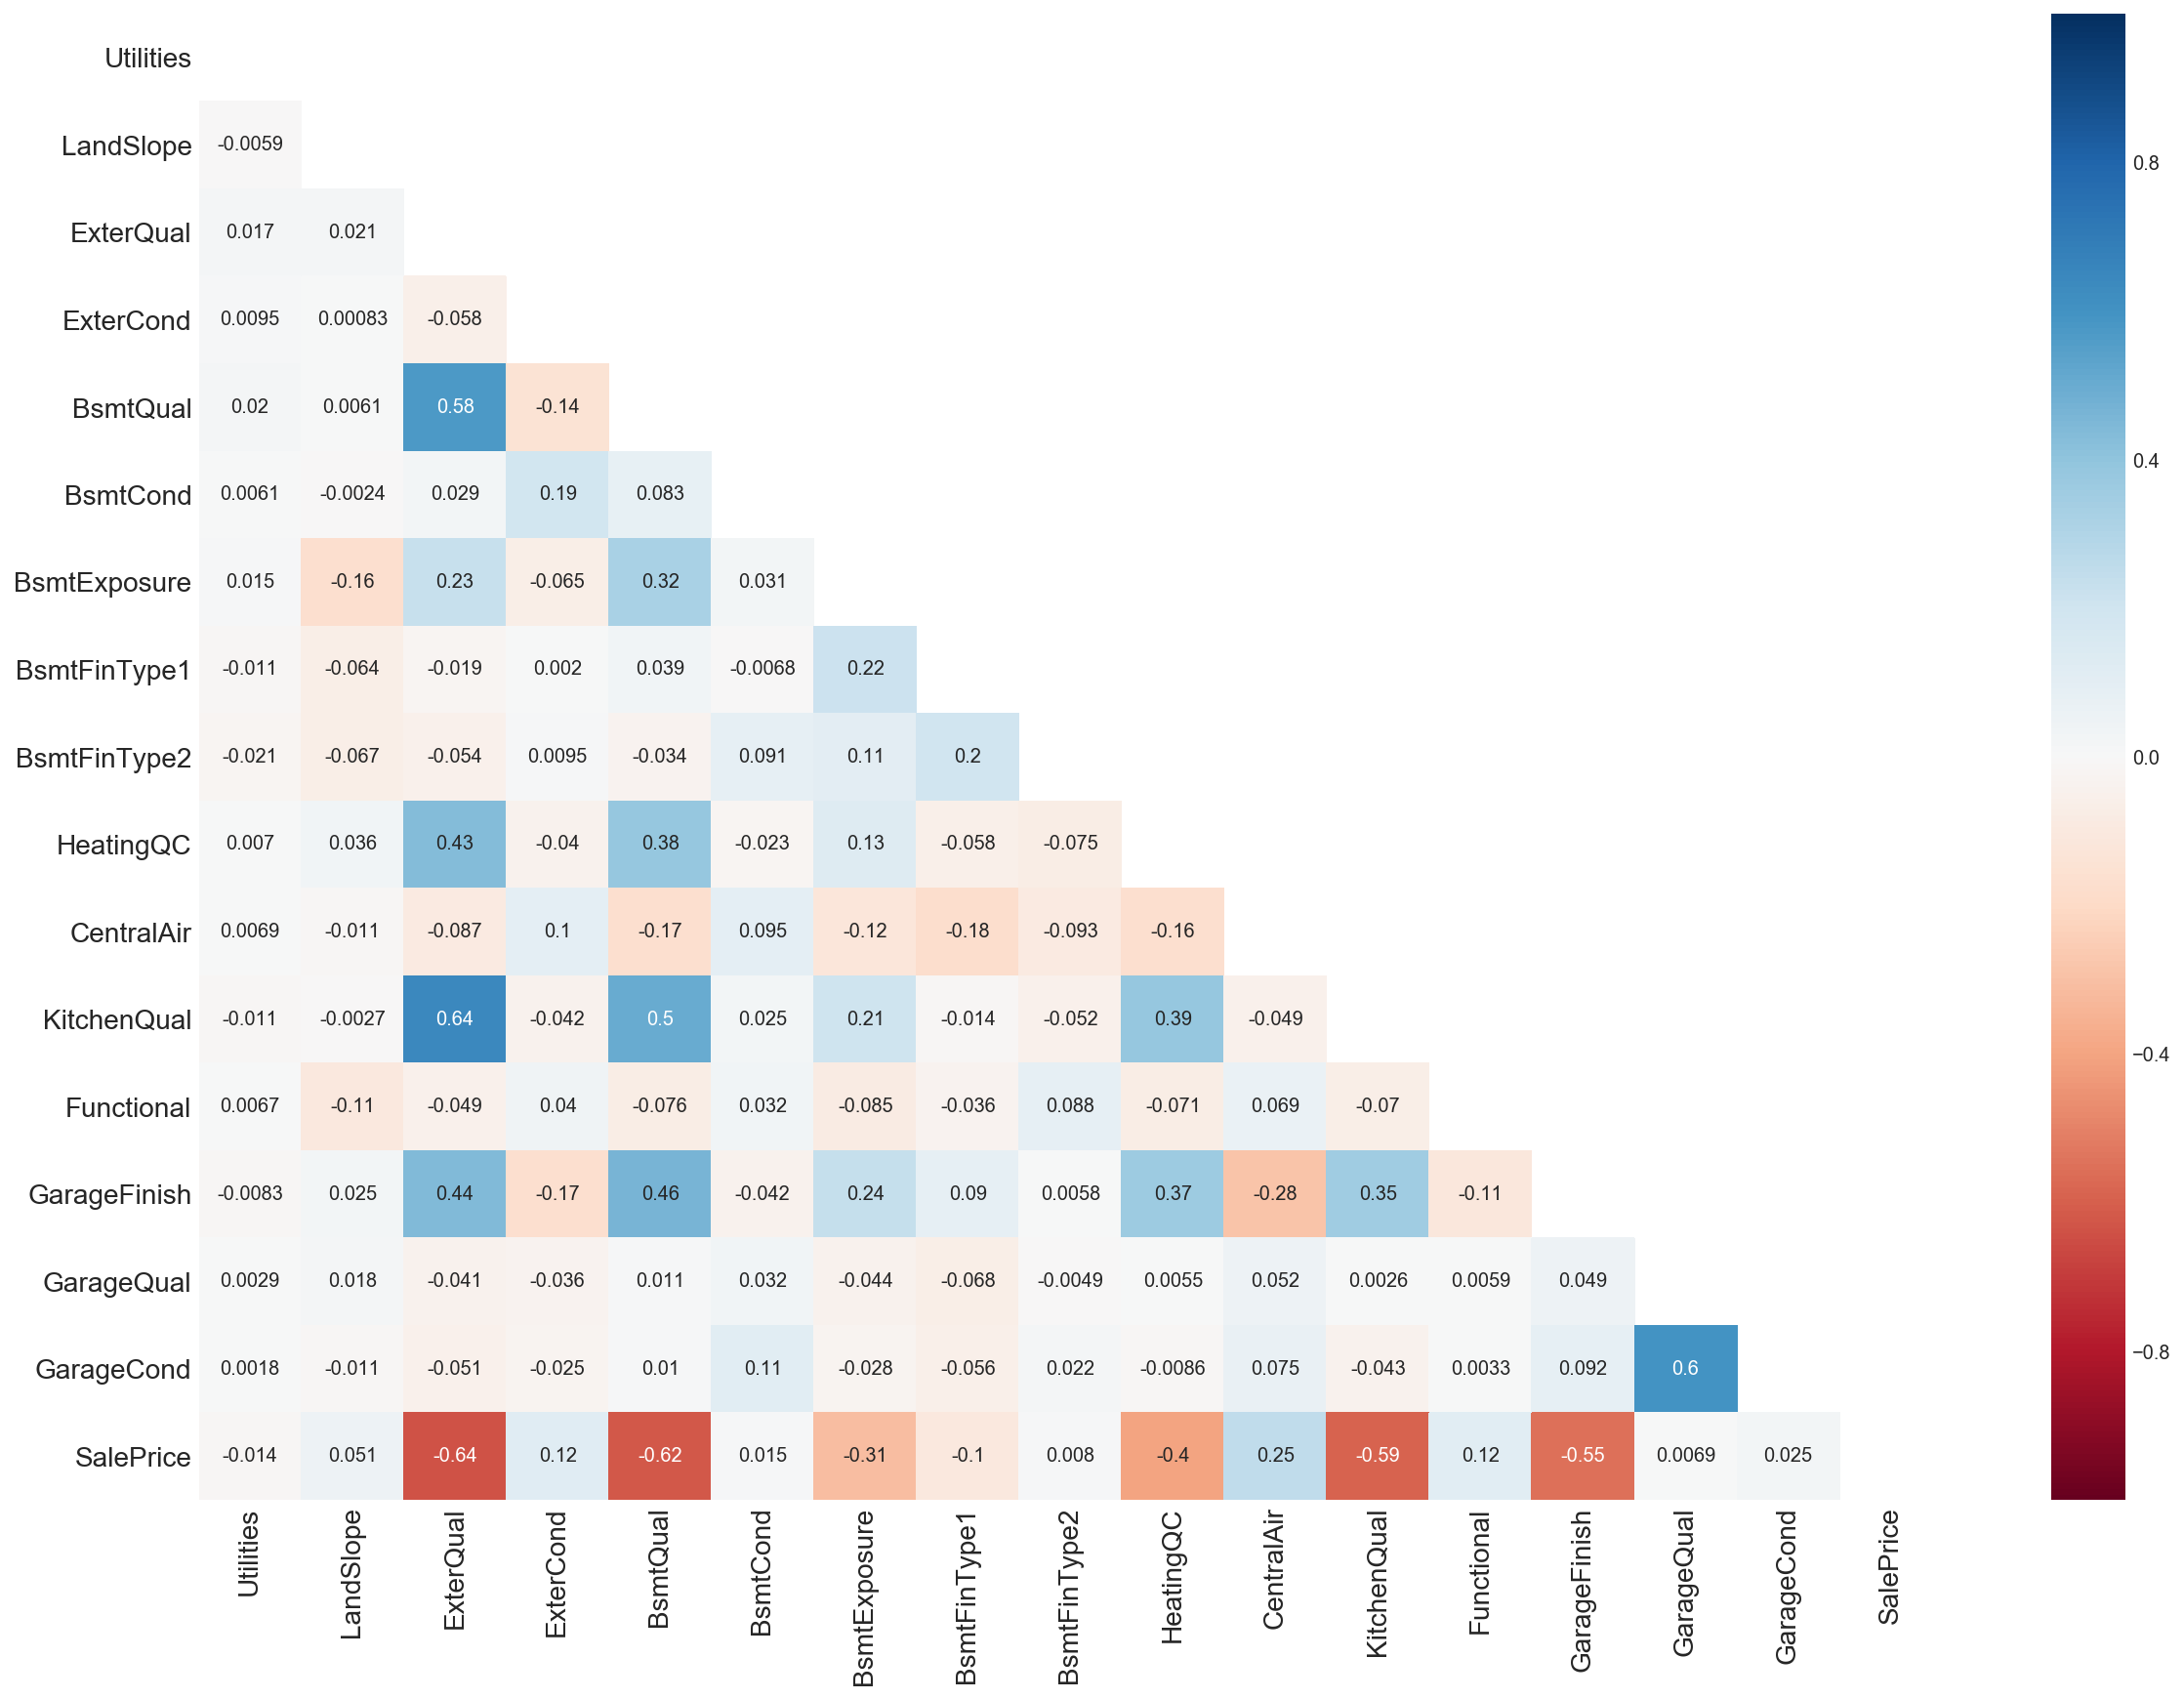

In [24]:
# change df to your DataFrame name. if needed, drop columns here.
mean_corr = new_ord_var.corr()
# Set the default matplotlib figure size to 20x14 OR WHATEVER.
fix, ax = plt.subplots(figsize=(20,14))
# Generate a mask for the upper triangle(taken from seaborn example gallery)
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, mask=mask, ax=ax, annot=True, cmap='RdBu', vmin=-1, vmax=1)
# Resize and rotate the labels
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

it seems that theres no multicollinearity within these variables set, however we can see that external quality, bsmt quality ,kitchen quality, and garage finish have negative relationship with price.


#### 2.2.3.3. EDA on ordinal categorical

In [25]:
qual_var= obj_df.select_dtypes(include=['object']).copy()
qual_var= pd.concat([qual_var, int_df['SalePrice'].reset_index(drop=True)], axis=1)
qual_var.head()

MSZoning Street LotShape LandContour LotConfig Neighborhood Condition1  \
0       RL   Pave      Reg         Lvl    Inside      CollgCr       Norm   
1       RL   Pave      Reg         Lvl       FR2      Veenker      Feedr   
2       RL   Pave      IR1         Lvl    Inside      CollgCr       Norm   
3       RL   Pave      IR1         Lvl    Corner      Crawfor       Norm   
4       RL   Pave      IR1         Lvl       FR2      NoRidge       Norm   

  Condition2 BldgType HouseStyle    ...    Exterior2nd MasVnrType Foundation  \
0       Norm     1Fam     2Story    ...        VinylSd    BrkFace      PConc   
1       Norm     1Fam     1Story    ...        MetalSd       None     CBlock   
2       Norm     1Fam     2Story    ...        VinylSd    BrkFace      PConc   
3       Norm     1Fam     2Story    ...        Wd Shng       None     BrkTil   
4       Norm     1Fam     2Story    ...        VinylSd    BrkFace      PConc   

  Heating Electrical GarageType PavedDrive SaleType SaleCondition SalePrice  
0    GasA      SBrkr     Attchd          Y       WD        Normal    208500  
1    GasA      SBrkr     Attchd          Y       WD        Normal    181500  
2    GasA      SBrkr     Attchd          Y       WD        Normal    223500  
3    GasA      SBrkr     Detchd          Y       WD       Abnorml    140000  
4    GasA      SBrkr     Attchd          Y       WD        Normal    250000  

[5 rows x 23 columns]

Text(0.5,1,u'MSZoning vs Sale Price')

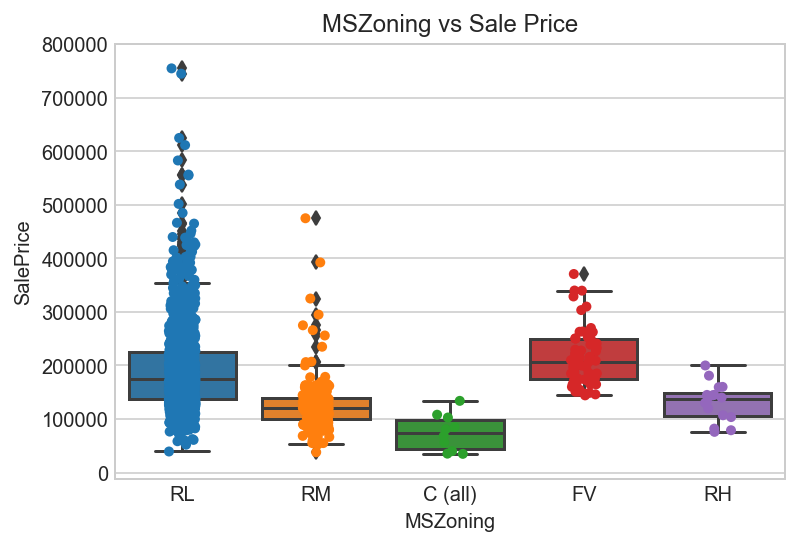

In [26]:
ax = sns.boxplot(x="MSZoning", y="SalePrice", 
                data=qual_var)
ax = sns.stripplot(x="MSZoning", y="SalePrice",
                   data=qual_var, jitter=True,
                   edgecolor="gray")
plt.title("MSZoning vs Sale Price",fontsize=12)

we can see that residential low density area (RL) and Floating Village Residential (FV) tend to have higher price

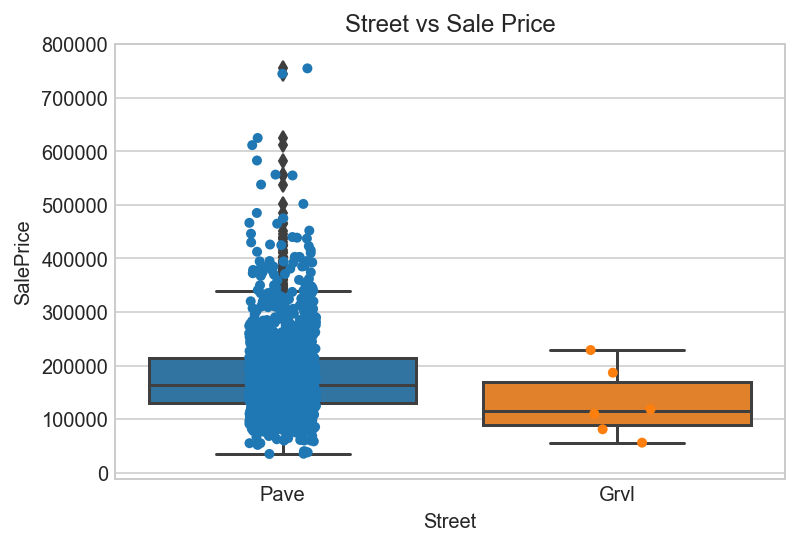

In [27]:
ax = sns.boxplot(x="Street", y="SalePrice", 
                data=qual_var)
ax = sns.stripplot(x="Street", y="SalePrice",
                   data=qual_var, jitter=True,
                   edgecolor="gray")
plt.title("Street vs Sale Price",fontsize=12);

It appears that certain neighborhoods sell for more than others. The distribution of prices make sense here as there should be varying prices with certain neighborhoods clearly valued higher.

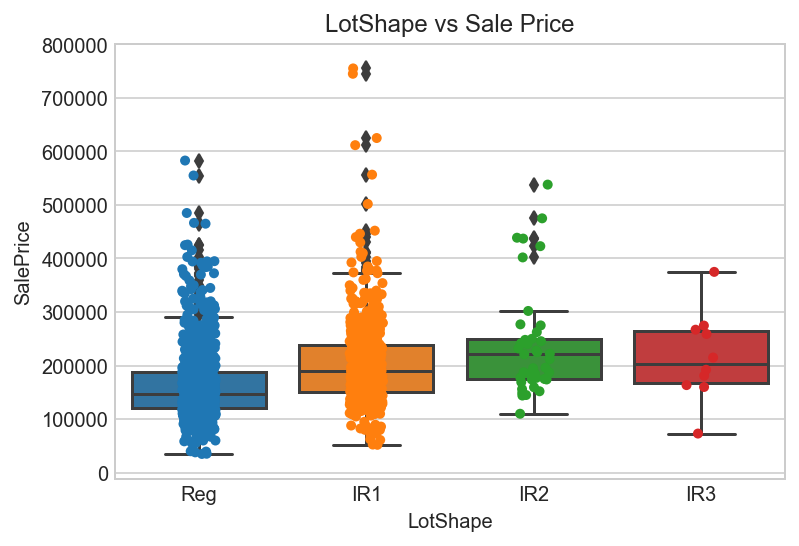

In [28]:
ax = sns.boxplot(x="LotShape", y="SalePrice", 
                data=qual_var)
ax = sns.stripplot(x="LotShape", y="SalePrice",
                   data=qual_var, jitter=True,
                   edgecolor="gray")
plt.title("LotShape vs Sale Price",fontsize=12);

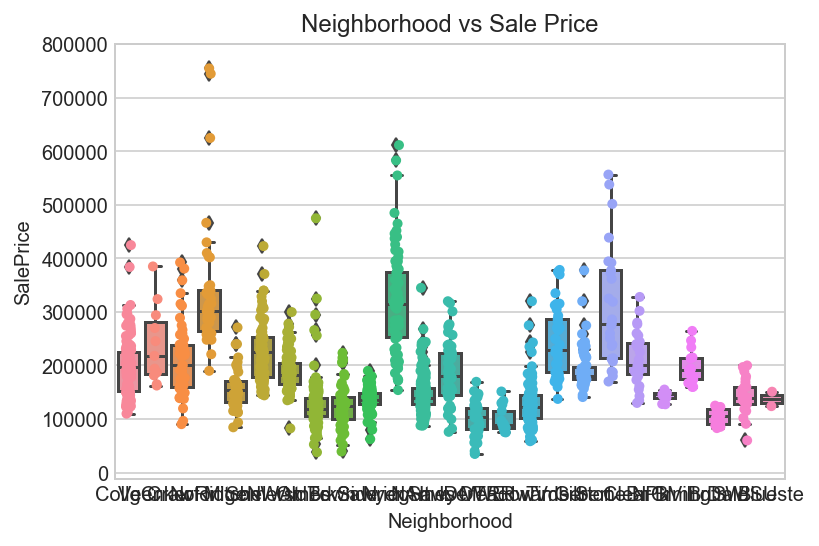

In [29]:
ax = sns.boxplot(x="Neighborhood", y="SalePrice", 
                data=qual_var)
ax = sns.stripplot(x="Neighborhood", y="SalePrice",
                   data=qual_var, jitter=True,
                   edgecolor="gray")
plt.title("Neighborhood vs Sale Price",fontsize=12);


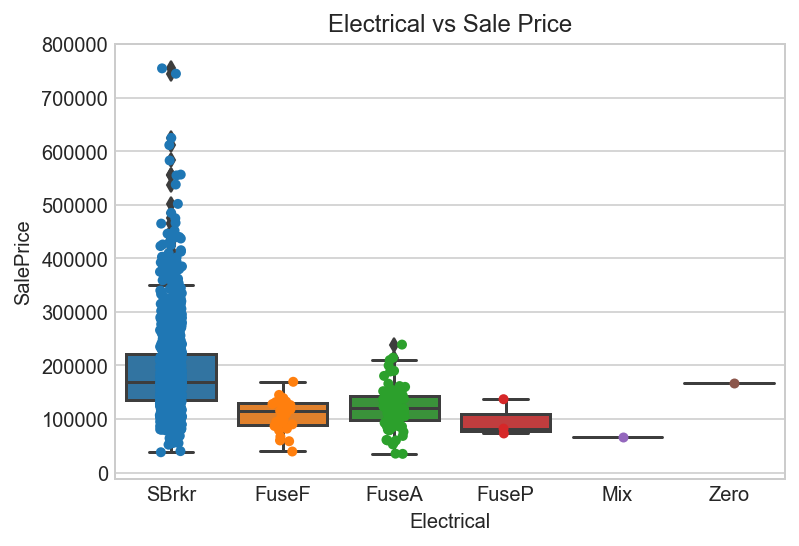

In [30]:
ax = sns.boxplot(x="Electrical", y="SalePrice", 
                data=qual_var)
ax = sns.stripplot(x="Electrical", y="SalePrice",
                   data=qual_var, jitter=True,
                   edgecolor="gray")
plt.title("Electrical vs Sale Price",fontsize=12);



In [31]:
# #One Hot encoding qualitative variables (Dummy variable)
# t = pd.get_dummies(obj_df, columns=nom_var).head()
# t.head()

## 3. Data Preparation

### 3.1. Bringing all features back together

In [32]:
## combined back the numeric and categorical features
full= pd.concat([obj_df, int_df.reset_index(drop=True)], axis=1)
full.head()
##to check that we have dropped 10 variables from missing values and multicollinerated variables. 
##Now theres 71 features in the ful dataframe

MSZoning Street LotShape LandContour  Utilities LotConfig  LandSlope  \
0       RL   Pave      Reg         Lvl          0    Inside          0   
1       RL   Pave      Reg         Lvl          0       FR2          0   
2       RL   Pave      IR1         Lvl          0    Inside          0   
3       RL   Pave      IR1         Lvl          0    Corner          0   
4       RL   Pave      IR1         Lvl          0       FR2          0   

  Neighborhood Condition1 Condition2    ...    WoodDeckSF OpenPorchSF  \
0      CollgCr       Norm       Norm    ...             0          61   
1      Veenker      Feedr       Norm    ...           298           0   
2      CollgCr       Norm       Norm    ...             0          42   
3      Crawfor       Norm       Norm    ...             0          35   
4      NoRidge       Norm       Norm    ...           192          84   

  EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal  MoSold  YrSold  \
0             0         0           0        0       0       2    2008   
1             0         0           0        0       0       5    2007   
2             0         0           0        0       0       9    2008   
3           272         0           0        0       0       2    2006   
4             0         0           0        0       0      12    2008   

  SalePrice  
0    208500  
1    181500  
2    223500  
3    140000  
4    250000  

[5 rows x 71 columns]

In [33]:
#Final check on null values
full.isnull().any().any()

False

### 3.2. Removing non-residential records 
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

residential = 'FV','RH', 'RL', 'RM', 'RP'

In [137]:
# remove non-residential 
full = full[full.MSZoning.isin(['FV','RH', 'RL', 'RM', 'RP'])].copy()

### 3.3. Dividing Dataframes into fixed characteristics & Renovatable characteristics

In [138]:
fixed_vars= ['MSSubClass','MSZoning','LotFrontage','LotArea','Street','LotShape','LandContour',
'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
'HouseStyle','OverallQual','YearBuilt','YearRemodAdd','RoofStyle','Foundation','BsmtQual',
'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
'BsmtUnfSF','1stFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
'BsmtHalfBath','FullBath','HalfBath','GarageType',
'GarageFinish','GarageCars','PavedDrive','WoodDeckSF','EnclosedPorch','OpenPorchSF','ScreenPorch',
'PoolArea','MiscVal', 'MoSold','YrSold']

renovatable_vars = ['OverallCond','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
'ExterCond','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
'Fireplaces','GarageQual','GarageCond','Utilities']

In [139]:
### next create fixed features df +  sale price
fixed_df =pd.concat([full[fixed_vars], full.SalePrice], axis=1)
fixed_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  LotConfig  LandSlope Neighborhood    ...     PavedDrive WoodDeckSF  \
0    Inside          0      CollgCr    ...              Y          0   
1       FR2          0      Veenker    ...              Y        298   
2    Inside          0      CollgCr    ...              Y          0   
3    Corner          0      Crawfor    ...              Y          0   
4       FR2          0      NoRidge    ...              Y        192   

  EnclosedPorch OpenPorchSF  ScreenPorch  PoolArea  MiscVal MoSold YrSold  \
0             0          61            0         0        0      2   2008   
1             0           0            0         0        0      5   2007   
2             0          42            0         0        0      9   2008   
3           272          35            0         0        0      2   2006   
4             0          84            0         0        0     12   2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 47 columns]

In [140]:
fixed_df.isnull().any().any()

False

In [142]:
### next create renovatable features df +  sale price
renovatable_df =pd.concat([full[renovatable_vars], full.SalePrice], axis=1)
renovatable_df.head()

OverallCond RoofMatl Exterior1st Exterior2nd MasVnrType  ExterQual  \
0            5  CompShg     VinylSd     VinylSd    BrkFace          2   
1            8  CompShg     MetalSd     MetalSd       None          3   
2            5  CompShg     VinylSd     VinylSd    BrkFace          2   
3            5  CompShg     Wd Sdng     Wd Shng       None          3   
4            5  CompShg     VinylSd     VinylSd    BrkFace          2   

   ExterCond Heating  HeatingQC  CentralAir Electrical  KitchenQual  \
0          4    GasA          0           1      SBrkr            2   
1          4    GasA          0           1      SBrkr            3   
2          4    GasA          0           1      SBrkr            2   
3          4    GasA          2           1      SBrkr            2   
4          4    GasA          0           1      SBrkr            2   

   Functional  Fireplaces  GarageQual  GarageCond  Utilities  SalePrice  
0           6           0           4           4          0     208500  
1           6           1           4           4          0     181500  
2           6           1           4           4          0     223500  
3           6           1           4           4          0     140000  
4           6           1           4           4          0     250000

# 4. Prediction Model for Fixed Characteristics
        
# 4.1 Data Preparation

In [39]:
obj = fixed_df.select_dtypes(include=['object']).copy()
obj_fix = pd.get_dummies(obj, columns=obj)
num_fix = fixed_df.select_dtypes(include=['int64','float64']).copy()


In [40]:
fix =pd.concat([obj_fix, num_fix], axis=1)
fix.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl  \
0            0            0            1            0            0   
1            0            0            1            0            0   
2            0            0            1            0            0   
3            0            0            1            0            0   
4            0            0            1            0            0   

   Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            1             0             0             0             1   
1            1             0             0             0             1   
2            1             1             0             0             0   
3            1             1             0             0             0   
4            1             1             0             0             0   

     ...      GarageCars  WoodDeckSF  EnclosedPorch  OpenPorchSF  ScreenPorch  \
0    ...               2           0              0           61            0   
1    ...               2         298              0            0            0   
2    ...               2           0              0           42            0   
3    ...               3           0            272           35            0   
4    ...               3         192              0           84            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2008     208500  
1         0        0       5    2007     181500  
2         0        0       9    2008     223500  
3         0        0       2    2006     140000  
4         0        0      12    2008     250000  

[5 rows x 122 columns]

In [41]:
fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Columns: 122 entries, MSZoning_FV to SalePrice
dtypes: float64(1), int64(25), uint8(96)
memory usage: 441.8 KB


In [169]:
fix.to_csv("all_df.csv", sep='\t', encoding='utf-8')

In [42]:
# split data into fixed training set based on year sold<2010 ,and year sold = 2010
f_train= fix[fix.YrSold < 2010].copy()
f_test = fix[fix.YrSold == 2010].copy()

In [43]:
#split data into X_train , y_train and X_test , y_test
y_train = f_train["SalePrice"]
x_train = f_train.drop("SalePrice", axis=1)

In [44]:
y_test = f_test["SalePrice"]
x_test = f_test.drop("SalePrice", axis=1)


In [45]:
# #Standardize Features
# x_train = (x_train  - x_train.mean()) / x_train.std()
# x_test =(x_test  - x_test.mean()) / x_test.std()

# #Standardize Features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# cols = x_train.columns
# scaler.fit(x_train)
# scaler.scale_ 
# x_train = pd.DataFrame(scaler.transform(x_train), columns =  cols)


# scaler.fit(x_test)
# scaler.scale_
# x_test = pd.DataFrame(scaler.transform(x_test), columns =  cols)

In [46]:
# split data into fixed training set based on year sold<2010 ,and year sold = 2010
f_train= fix[fix.YrSold < 2010].copy()
f_test = fix[fix.YrSold == 2010].copy()


# #Standardize Features
# x_train = (x_train  - x_train.mean()) / x_train.std()
# x_test =(x_test  - x_test.mean()) / x_test.std()

#Standardize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaler.transform(x_train)

scaler.fit(x_test)
scaler.transform(x_test)

array([[-0.22086305,  0.        ,  0.46889035, ...,  1.62938197,
        -0.89443395,  0.        ],
       [-0.22086305,  0.        ,  0.46889035, ..., -0.20576854,
         0.44332813,  0.        ],
       [-0.22086305,  0.        ,  0.46889035, ..., -0.20576854,
         0.44332813,  0.        ],
       ..., 
       [-0.22086305,  0.        ,  0.46889035, ..., -0.20576854,
        -1.563315  ,  0.        ],
       [-0.22086305,  0.        ,  0.46889035, ...,  6.34834043,
         0.44332813,  0.        ],
       [-0.22086305,  0.        ,  0.46889035, ..., -0.20576854,
        -0.22555291,  0.        ]])

# 4.2  Feature Selection

for feature selection I am going to try to select features using select XGBoost,K-means, Recursive Feature Elimination (RFE),  Feature elimination using the lasso penalty, and compares the scores together with using all valirables. After that I will decide which set to column to proceed to be used in the model.



# 4.2.1. Trying XGBoost for Feature Selection

To simplify the feature selection process, we fitted an XGBoost model containing all of the housing features (~122 features) and called its feature importance function to determine the most important predictors of realty price. XGBoost is one of the most efficient method in fature selection.

In [47]:
# fit model no training data
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [48]:
a= model.feature_importances_
a[::-1].sort(kind='quicksort')
print(a)

[  1.32186845e-01   1.26684159e-01   1.22693315e-01   1.09942637e-01
   8.03059265e-02   5.06469831e-02   5.02023213e-02   4.94241640e-02
   4.80901785e-02   4.66561429e-02   2.90253013e-02   2.10102722e-02
   1.53408330e-02   1.24282986e-02   6.42536348e-03   5.42487437e-03
   5.04691200e-03   4.98021254e-03   4.44661826e-03   4.35768580e-03
   4.14647162e-03   3.89079098e-03   3.87967448e-03   3.75739252e-03
   3.67957680e-03   3.37942992e-03   3.17933201e-03   3.01258382e-03
   2.84583564e-03   2.56792200e-03   2.56792200e-03   2.42340704e-03
   2.36782432e-03   2.06767744e-03   1.95651199e-03   1.74529769e-03
   1.55631639e-03   1.54519989e-03   1.44515093e-03   1.36733509e-03
   1.33398548e-03   1.24505314e-03   1.10053807e-03   1.02272222e-03
   9.56022937e-04   9.33789881e-04   9.22673324e-04   8.33740924e-04
   8.11507867e-04   8.00391310e-04   7.89274753e-04   7.33692024e-04
   6.44759682e-04   5.78060397e-04   5.78060397e-04   5.66943840e-04
   5.33594226e-04   5.33594226e-04

In [49]:
xgb_params = {"objective": "reg:linear", "eta": 0.01, "max_depth": 8, "seed": 42, "silent": 1}
num_rounds = 1000

dtrain = xgb.DMatrix(x_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)

importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore%'] = df['fscore'] / df['fscore'].sum()
df_20 = df.sort_values(by ='fscore', ascending=False)[0:20]
print df_20

              feature  fscore   fscore%
111           LotArea    5200  0.071902
110         GrLivArea    5171  0.071501
109         BsmtUnfSF    3845  0.053166
108          1stFlrSF    3823  0.052862
107        BsmtFinSF1    3816  0.052765
106       LotFrontage    3481  0.048133
105      YearRemodAdd    3140  0.043418
104         YearBuilt    3066  0.042394
103       OpenPorchSF    2992  0.041371
102            MoSold    2990  0.041343
101        WoodDeckSF    2340  0.032356
100      LotShape_IR1    2222  0.030724
99        OverallQual    1963  0.027143
98             YrSold    1346  0.018611
97   LotConfig_Corner    1269  0.017547
96         BsmtFinSF2     893  0.012348
95        MSZoning_RL     861  0.011905
94      EnclosedPorch     763  0.010550
93    LandContour_Bnk     724  0.010011
92         GarageCars     718  0.009928


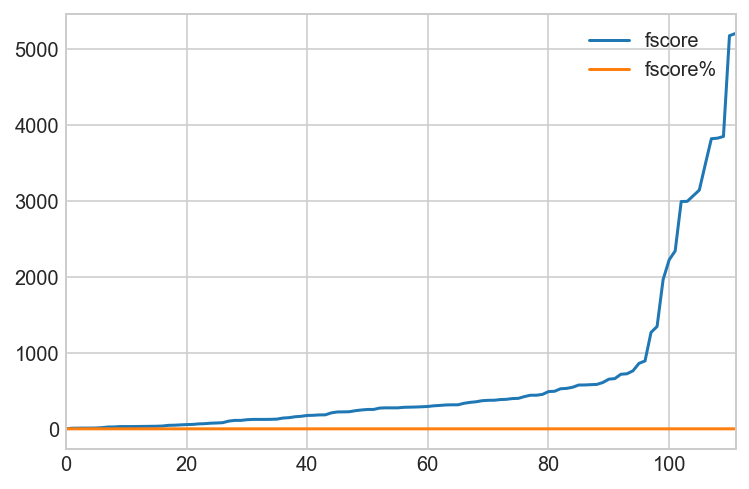

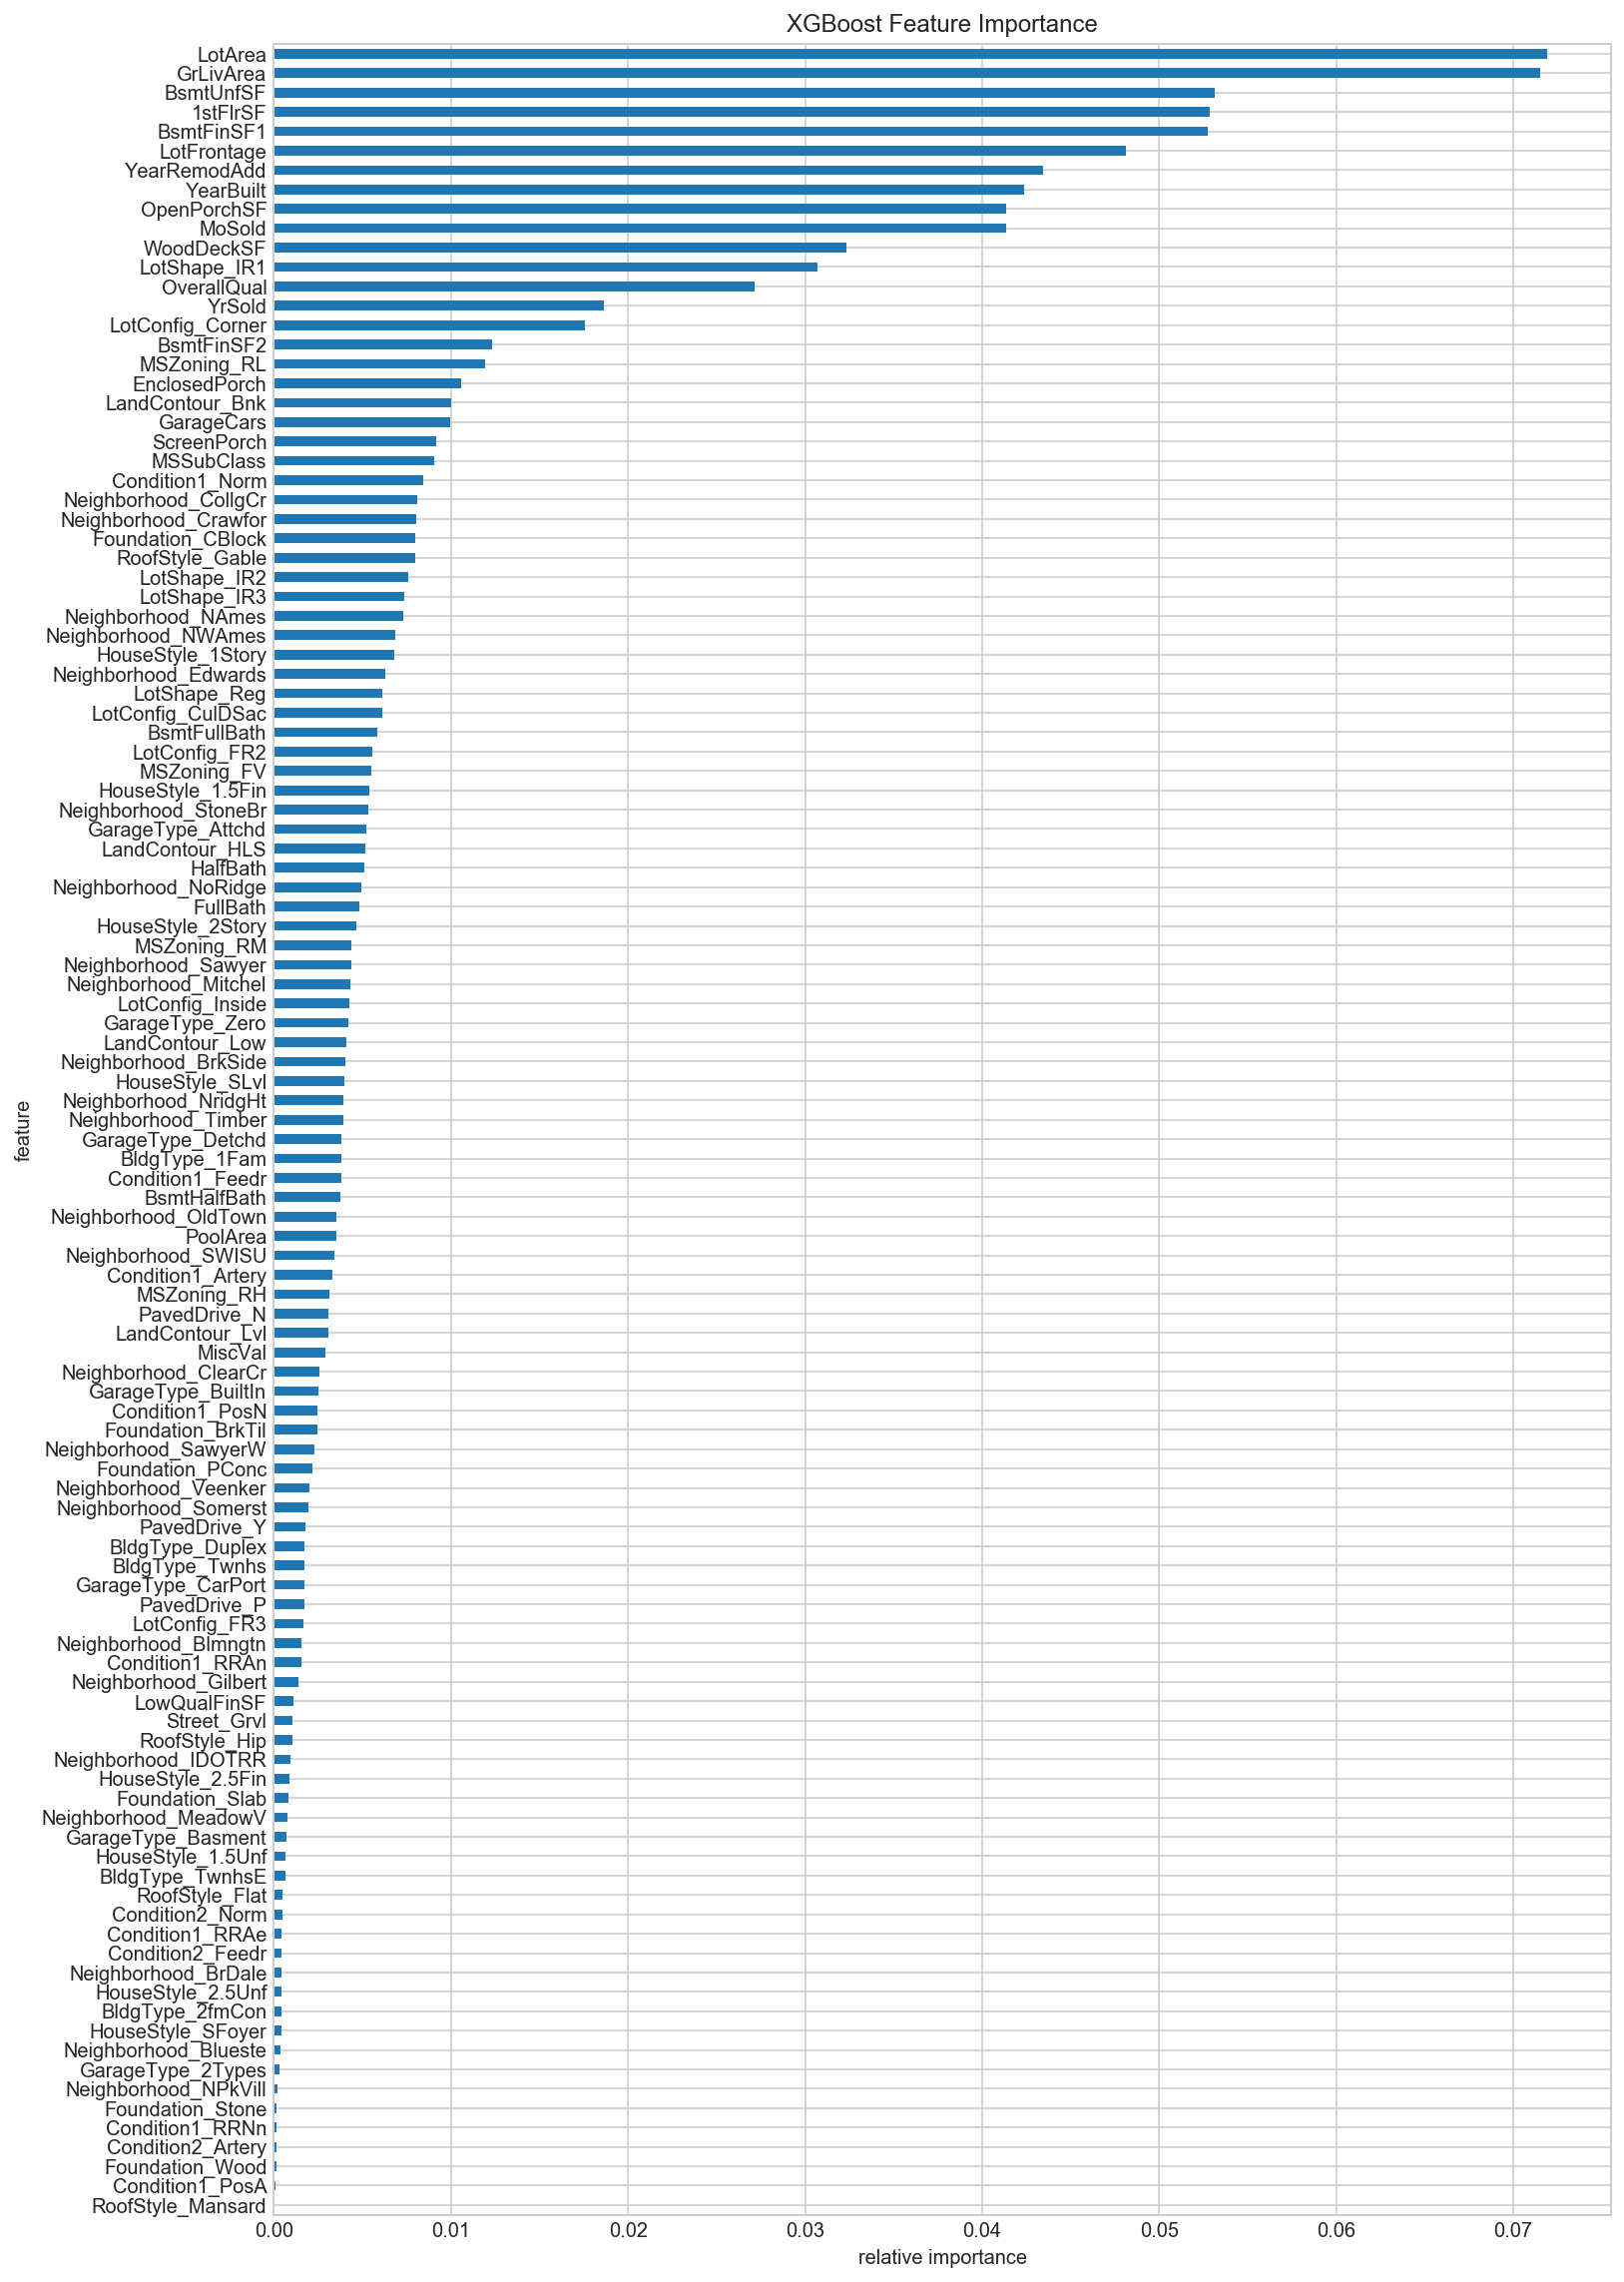

In [50]:
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore%', legend=False, figsize=(12, 20))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.show()

In [51]:
xgb_columns = df_20.feature.values[0:15]
xgb_columns

array(['LotArea', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF', 'BsmtFinSF1',
       'LotFrontage', 'YearRemodAdd', 'YearBuilt', 'OpenPorchSF', 'MoSold',
       'WoodDeckSF', 'LotShape_IR1', 'OverallQual', 'YrSold',
       'LotConfig_Corner'], dtype=object)

We will select the variables until the last drops of significance from 18th variable: LotConfig_Corner
so we are using 18 features of XGBoost

# 4.2.2. Trying K-Best for Feature Selection

Let's use the `SelectKBest` method in scikit learn to see which are the top 15 features.

> The f-test is explained variance divided by unexplained variance. High numbers will results if our explained variance, what we know is much greater than unexplained, what we dont know. The Chi2 goodness of fit is the sum of the difference squared between observed and expected divided by expected.

In [52]:
from sklearn.feature_selection import SelectKBest,f_regression

# build the selector (we'll build one with each score type)
skb_f = SelectKBest(f_regression, k=15)

# train the selector on our data
skb_f.fit(x_train, y_train)

# examine results
kbest = pd.DataFrame([list(x_train), list(skb_f.scores_)], 
                     index=['feature','f_regression']).T.sort_values('f_regression', ascending=False)
kbest[0:20]

feature f_regression
99            OverallQual      2121.91
107             GrLivArea         1284
112            GarageCars      894.937
105              1stFlrSF      711.931
110              FullBath      590.937
100             YearBuilt      453.593
101          YearRemodAdd      438.748
82       Foundation_PConc      387.207
35   Neighborhood_NridgHt      255.633
102            BsmtFinSF1      198.815
91      GarageType_Detchd      184.346
34   Neighborhood_NoRidge      166.879
115           OpenPorchSF      160.695
113            WoodDeckSF        158.5
87      GarageType_Attchd      156.011
81      Foundation_CBlock      152.956
3             MSZoning_RM      117.217
111              HalfBath       108.84
9            LotShape_Reg      92.1652
98                LotArea      90.6749

In [53]:
kbest_columns = kbest.feature.values[0:15]
kbest_columns

array(['OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'FullBath',
       'YearBuilt', 'YearRemodAdd', 'Foundation_PConc',
       'Neighborhood_NridgHt', 'BsmtFinSF1', 'GarageType_Detchd',
       'Neighborhood_NoRidge', 'OpenPorchSF', 'WoodDeckSF',
       'GarageType_Attchd'], dtype=object)

For Kbest, we will select top 18 fetaures

# 4.2.3. Recursive Feature Elimination (RFE) for feature selection

Sklearn also offers recursive feature elimination as a class named `RFECV`. Use it in combination with a logistic regression model to see what features would be kept with this method.

When instantiating the `RFECV`:
- `step` indicates what percent of features (or number of features if an integer) to remove at each iteration.
- `cv` indicates the number of cross-validation folds to use for evaluating what features are important.

Store the columns in a variable called `rfecv_columns`.

In [54]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
selector = RFECV(lr, step=1, cv=10)
selector = selector.fit(x_train, y_train)

print selector.support_
print selector.ranking_

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False  True  True  True False False False False False  True
  True  True  True  True  True False False False False False False  True
  True]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 

In [55]:
rfecv = pd.DataFrame([list(x_train), list(selector.support_),list(selector.ranking_) ], 
                     index=['feature','RFECV_support','RFECV_ranking']).T.sort_values('RFECV_ranking', ascending=True)
rfecv.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 104
Data columns (total 3 columns):
feature          121 non-null object
RFECV_support    121 non-null object
RFECV_ranking    121 non-null object
dtypes: object(3)
memory usage: 3.8+ KB


In [56]:
rfecv[rfecv['RFECV_support'] == True].sum()


feature          MSZoning_FVRoofStyle_MansardRoofStyle_HipRoofS...
RFECV_support                                                 True
RFECV_ranking                                                  108
dtype: object

In [57]:
rfecv_columns = rfecv[rfecv['RFECV_support'] == True]['feature']
rfecv_columns = list(rfecv_columns)
len(rfecv_columns)

108

Recursive Feature Elimination (RFE), it deletes 14 out of 122 variables and keep 108 variables. 

# 4.2.4. Feature elimination using the lasso penalty

The L1 penalty is a popular method for feature selection. As the regularization strength increases more features will be removed.

In [58]:
from sklearn.linear_model import RandomizedLasso

names = x_train.columns
rlasso = RandomizedLasso(alpha=0.025)
rlasso.fit(x_train, y_train)
 
print "Features sorted by their score:"
lasso = pd.DataFrame([list(x_train), list(rlasso.scores_)], 
                     index=['feature','R_Lasso_score']).T.sort_values('R_Lasso_score', ascending=False)
print (lasso)[0:25]

/Users/hernandoren/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


Features sorted by their score:
                  feature R_Lasso_score
41   Neighborhood_StoneBr             1
34   Neighborhood_NoRidge             1
35   Neighborhood_NridgHt             1
107             GrLivArea             1
30   Neighborhood_Mitchel             1
40   Neighborhood_Somerst             1
43   Neighborhood_Veenker             1
25   Neighborhood_Crawfor             1
49        Condition1_RRAe             1
102            BsmtFinSF1             1
21    Neighborhood_BrDale             1
101          YearRemodAdd             1
100             YearBuilt             1
99            OverallQual             1
33    Neighborhood_NWAmes             1
98                LotArea             1
64         BldgType_Twnhs             1
112            GarageCars             1
113            WoodDeckSF             1
92        GarageType_Zero             1
72      HouseStyle_SFoyer             1
86      GarageType_2Types         0.995
11        LandContour_HLS         0.995
96      

we will try 2 lasso dataset with score above 0.995 (means all ==1 ), and lasso dataset with score > 0.95

In [59]:
rlasso_col_above95 = lasso[lasso['R_Lasso_score'] > 0.95]['feature']
rlasso_columns_above95 = list(rlasso_col_above95)

rlasso_col_above995= lasso[lasso['R_Lasso_score'] > 0.995]['feature']
rlasso_columns_above995 = list(rlasso_col_above995)


In [60]:
print ("number of features for lasso > 0.95 " , len(rlasso_columns_above95))
print ("number of features for lasso > 0.995 " , len(rlasso_columns_above995))

('number of features for lasso > 0.95 ', 50)
('number of features for lasso > 0.995 ', 21)


we can see there's huge difference between lasso above 0.995 which includes 21 features, while lasso above 0.95 includes 52 features out of 122 available features

# 4.2.5. Comparing the features sets
Use the optimized linear regression to compare: 
- 'xgb_columns'
- `kbest_columns`
- `rfecv_columns`
- `rlasso_columns`
- `all_columns`


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [62]:
all_columns= fix.columns
#all_columns

In [63]:
xgb_columns
# xgb_columns=['LotArea', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF', 'BsmtFinSF1',
#        'LotFrontage', 'YearRemodAdd', 'YearBuilt', 'OpenPorchSF', 'MoSold',
#        'WoodDeckSF', 'LotShape_IR1', 'OverallQual', 'YrSold',
#        'LotConfig_Corner']
#kbest_columns
#rfecv_columns
#rlasso_columns

array(['LotArea', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF', 'BsmtFinSF1',
       'LotFrontage', 'YearRemodAdd', 'YearBuilt', 'OpenPorchSF', 'MoSold',
       'WoodDeckSF', 'LotShape_IR1', 'OverallQual', 'YrSold',
       'LotConfig_Corner'], dtype=object)

In [64]:
lr = LinearRegression()

# defining a function to test our best features head-to-head
def score(x_train):
    scores = cross_val_score(lr, x_train, y_train, cv=5)
    return scores.mean(), scores.std()

# list of all our lists of best features being executed in the score function
all_scores = [
    score(x_train[xgb_columns]),
    score(x_train[kbest_columns]),
    score(x_train[rfecv_columns]),
    score(x_train[rlasso_columns_above95]),
    score(x_train[rlasso_columns_above995]),
    score(x_train)]
  
#putting results into a dataframe
pd.DataFrame(all_scores, columns=['mean score', 'std score'], index = ['xgb','kbest', 'rfecv', 'Randomized Lasso Above 0.95', 
                                                                       'Randomized Lasso Above 0.995', 'all'])

mean score  std score
xgb                             0.756757   0.079342
kbest                           0.781528   0.052213
rfecv                           0.800116   0.041185
Randomized Lasso Above 0.95     0.817717   0.054111
Randomized Lasso Above 0.995    0.807233   0.051164
all                             0.793704   0.061949

Based on the mean score of R2 of all different columns using different method of features selection, the Randomized lasso gives much better predictor overall. and we can see that while randomized lasso above 0.95 gives slight better predictor than Randomized Lasso Above 0.995, it takes incerase of features from 21 to 52 features as predictor, therefore, so we will select this **Randomized Lasso Above 0.95** set of features to predict SalePrice with 21 number of predictors

In [65]:
rlasso_columns = rlasso_columns_above995

In [66]:
#UPDATING x_train and x_test features based on rlasso_columns
x_train = x_train[rlasso_columns]
x_train.head()

Neighborhood_StoneBr  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     1                     0   

   GrLivArea  Neighborhood_Mitchel  Neighborhood_Somerst  \
0       1710                     0                     0   
1       1262                     0                     0   
2       1786                     0                     0   
3       1717                     0                     0   
4       2198                     0                     0   

   Neighborhood_Veenker  Neighborhood_Crawfor  Condition1_RRAe  BsmtFinSF1  \
0                     0                     0                0         706   
1                     1                     0                0         978   
2                     0                     0                0         486   
3                     0                     1                0         216   
4                     0                     0                0         655   

         ...          YearRemodAdd  YearBuilt  OverallQual  \
0        ...                  2003       2003            7   
1        ...                  1976       1976            6   
2        ...                  2002       2001            7   
3        ...                  1970       1915            7   
4        ...                  2000       2000            8   

   Neighborhood_NWAmes  LotArea  BldgType_Twnhs  GarageCars  WoodDeckSF  \
0                    0     8450               0           2           0   
1                    0     9600               0           2         298   
2                    0    11250               0           2           0   
3                    0     9550               0           3           0   
4                    0    14260               0           3         192   

   GarageType_Zero  HouseStyle_SFoyer  
0                0                  0  
1                0                  0  
2                0                  0  
3                0                  0  
4                0                  0  

[5 rows x 21 columns]

In [67]:
#UPDATING x_train and x_test features based on rlasso_columns
x_test = x_test[rlasso_columns]
x_test.head()

Neighborhood_StoneBr  Neighborhood_NoRidge  Neighborhood_NridgHt  \
16                     0                     0                     0   
24                     0                     0                     0   
26                     0                     0                     0   
27                     0                     0                     1   
33                     0                     0                     0   

    GrLivArea  Neighborhood_Mitchel  Neighborhood_Somerst  \
16       1004                     0                     0   
24       1060                     0                     0   
26        900                     0                     0   
27       1704                     0                     0   
33       1700                     0                     0   

    Neighborhood_Veenker  Neighborhood_Crawfor  Condition1_RRAe  BsmtFinSF1  \
16                     0                     0                0         578   
24                     0                     0                0         188   
26                     0                     0                0         234   
27                     0                     0                0        1218   
33                     0                     0                0        1018   

          ...          YearRemodAdd  YearBuilt  OverallQual  \
16        ...                  1970       1970            6   
24        ...                  2001       1968            5   
26        ...                  2000       1951            5   
27        ...                  2008       2007            8   
33        ...                  1959       1959            5   

    Neighborhood_NWAmes  LotArea  BldgType_Twnhs  GarageCars  WoodDeckSF  \
16                    0    11241               0           2           0   
24                    0     8246               0           1         406   
26                    0     7200               0           2         222   
27                    0    11478               0           3           0   
33                    0    10552               0           2           0   

    GarageType_Zero  HouseStyle_SFoyer  
16                0                  0  
24                0                  0  
26                0                  0  
27                0                  0  
33                0                  0  

[5 rows x 21 columns]

In [68]:
#Standardize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = x_train.columns
scaler.fit(x_train)
scaler.scale_ 
x_train = pd.DataFrame(scaler.transform(x_train), columns =  cols)


scaler.fit(x_test)
scaler.scale_
x_test = pd.DataFrame(scaler.transform(x_test), columns =  cols)

In [69]:
x_train.head()

Neighborhood_StoneBr  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0             -0.126088             -0.165321             -0.238897   
1             -0.126088             -0.165321             -0.238897   
2             -0.126088             -0.165321             -0.238897   
3             -0.126088             -0.165321             -0.238897   
4             -0.126088              6.048821             -0.238897   

   GrLivArea  Neighborhood_Mitchel  Neighborhood_Somerst  \
0   0.356109              -0.19104             -0.254951   
1  -0.492294              -0.19104             -0.254951   
2   0.500035              -0.19104             -0.254951   
3   0.369366              -0.19104             -0.254951   
4   1.280263              -0.19104             -0.254951   

   Neighborhood_Veenker  Neighborhood_Crawfor  Condition1_RRAe  BsmtFinSF1  \
0             -0.093177             -0.197546        -0.079368    0.571958   
1             10.732279             -0.197546        -0.079368    1.163930   
2             -0.093177             -0.197546        -0.079368    0.093156   
3             -0.093177              5.062114        -0.079368   -0.494463   
4             -0.093177             -0.197546        -0.079368    0.460963   

         ...          YearRemodAdd  YearBuilt  OverallQual  \
0        ...              0.875532   1.038568     0.633233   
1        ...             -0.436226   0.146572    -0.091272   
2        ...              0.826948   0.972494     0.633233   
3        ...             -0.727728  -1.868678     0.633233   
4        ...              0.729781   0.939457     1.357737   

   Neighborhood_NWAmes   LotArea  BldgType_Twnhs  GarageCars  WoodDeckSF  \
0            -0.233357 -0.202915       -0.175058    0.292575   -0.756584   
1            -0.233357 -0.092329       -0.175058    0.292575    1.653565   
2            -0.233357  0.066337       -0.175058    0.292575   -0.756584   
3            -0.233357 -0.097137       -0.175058    1.627973   -0.756584   
4            -0.233357  0.355783       -0.175058    1.627973    0.796263   

   GarageType_Zero  HouseStyle_SFoyer  
0        -0.237062          -0.157669  
1        -0.237062          -0.157669  
2        -0.237062          -0.157669  
3        -0.237062          -0.157669  
4        -0.237062          -0.157669  

[5 rows x 21 columns]

In [70]:
x_test.head()

Neighborhood_StoneBr  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0             -0.173032             -0.205971             -0.220863   
1             -0.173032             -0.205971             -0.220863   
2             -0.173032             -0.205971             -0.220863   
3             -0.173032             -0.205971              4.527693   
4             -0.173032             -0.205971             -0.220863   

   GrLivArea  Neighborhood_Mitchel  Neighborhood_Somerst  \
0  -0.963394             -0.154303             -0.220863   
1  -0.851479             -0.154303             -0.220863   
2  -1.171235             -0.154303             -0.220863   
3   0.435540             -0.154303             -0.220863   
4   0.427546             -0.154303             -0.220863   

   Neighborhood_Veenker  Neighborhood_Crawfor  Condition1_RRAe  BsmtFinSF1  \
0                   0.0             -0.133235        -0.133235    0.274481   
1                   0.0             -0.133235        -0.133235   -0.630963   
2                   0.0             -0.133235        -0.133235   -0.524167   
3                   0.0             -0.133235        -0.133235    1.760339   
4                   0.0             -0.133235        -0.133235    1.296009   

         ...          YearRemodAdd  YearBuilt  OverallQual  \
0        ...             -0.769005  -0.064716    -0.022202   
1        ...              0.761542  -0.136070    -0.785968   
2        ...              0.712169  -0.742579    -0.785968   
3        ...              1.107149   1.255332     1.505329   
4        ...             -1.312102  -0.457163    -0.785968   

   Neighborhood_NWAmes   LotArea  BldgType_Twnhs  GarageCars  WoodDeckSF  \
0            -0.205971  0.154356       -0.173032    0.434091   -0.754544   
1            -0.205971 -0.314032       -0.173032   -0.974657    2.181560   
2            -0.205971 -0.477616       -0.173032    0.434091    0.850912   
3            -0.205971  0.191421       -0.173032    1.842839   -0.754544   
4            -0.205971  0.046603       -0.173032    0.434091   -0.754544   

   GarageType_Zero  HouseStyle_SFoyer  
0        -0.261387          -0.190117  
1        -0.261387          -0.190117  
2        -0.261387          -0.190117  
3        -0.261387          -0.190117  
4        -0.261387          -0.190117  

[5 rows x 21 columns]

# Running Prediction Model using normal linear regression, and using normalization: Ridged, Lasso & Elasticnet

In [71]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print("Score :", lr.score)



('Score :', <bound method LinearRegression.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>)


In [97]:
# Define error measure for official scoring RMSE, and R2 (R-square) Scores
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, x_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

# Prints R2 scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))

    
# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    print("Train")
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)
    
#     ## Printing RMSE
#     rmse_train= np.sqrt(-cross_val_score(estimator, x_trn, y_trn, scoring = scorer, cv = 10))
#     print("RMSE on Training set :", rmse_train(lr).mean())

#     rmse_test= np.sqrt(-cross_val_score(estimator, x_tst, y_tst, scoring = scorer, cv = 10))
#     print("RMSE on Test set :", rmse_test(lr).mean())

('RMSE on Training set :', 33549.04275218385)
('RMSE on Test set :', 33260.4931850004)
('Score :', <bound method LinearRegression.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>)
Train
R2: 0.783065283652
Test
R2: 0.809704049494


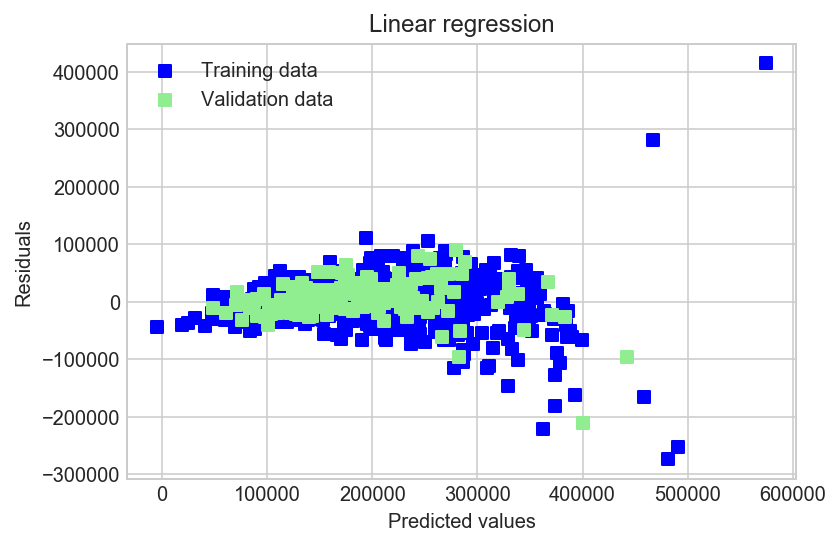

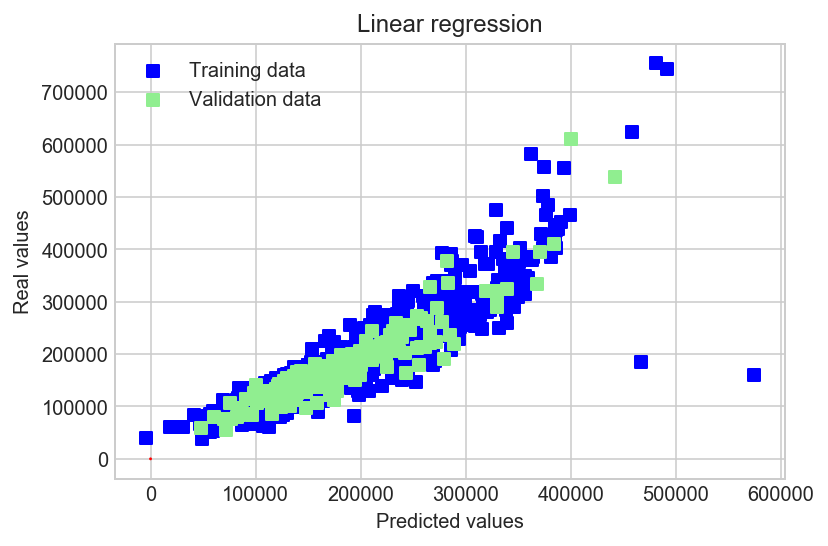

In [85]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print("Score :", lr.score)

train_test(lr.fit(x_train, y_train), x_train, x_test, y_train, y_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

('Best alpha :', 60.0)
Try again for more precision with alphas centered around 60.0
('Best alpha :', 84.0)
('Ridge RMSE on Training set :', 33503.197356652134)
('Ridge RMSE on Test set :', 31704.011086361665)
Train
R2: 0.77233073881
Test
R2: 0.799243167565


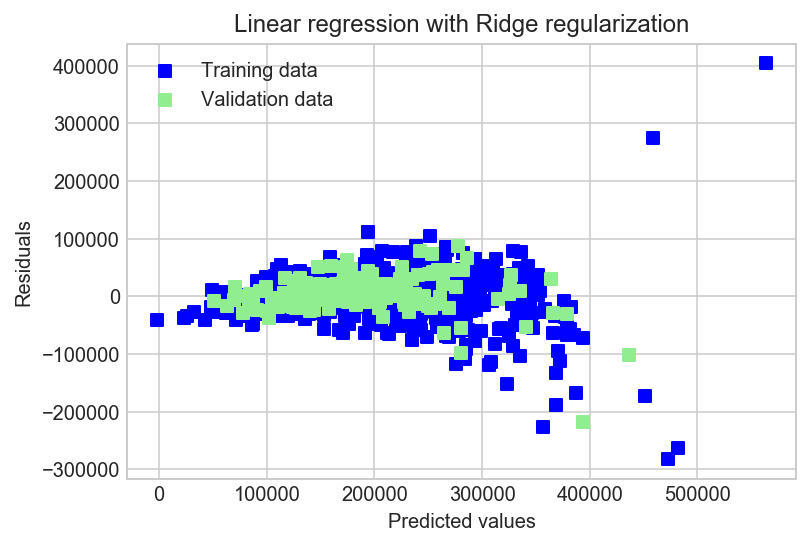

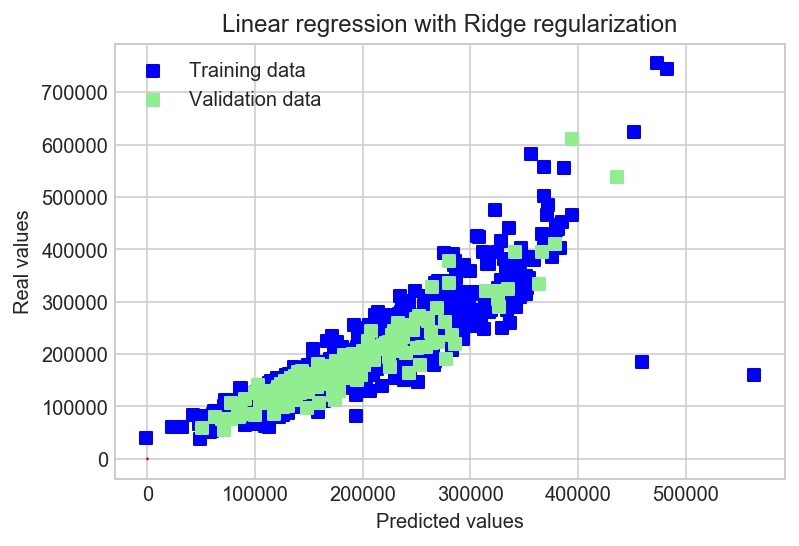

Ridge picked 21 features and eliminated the other 0 features


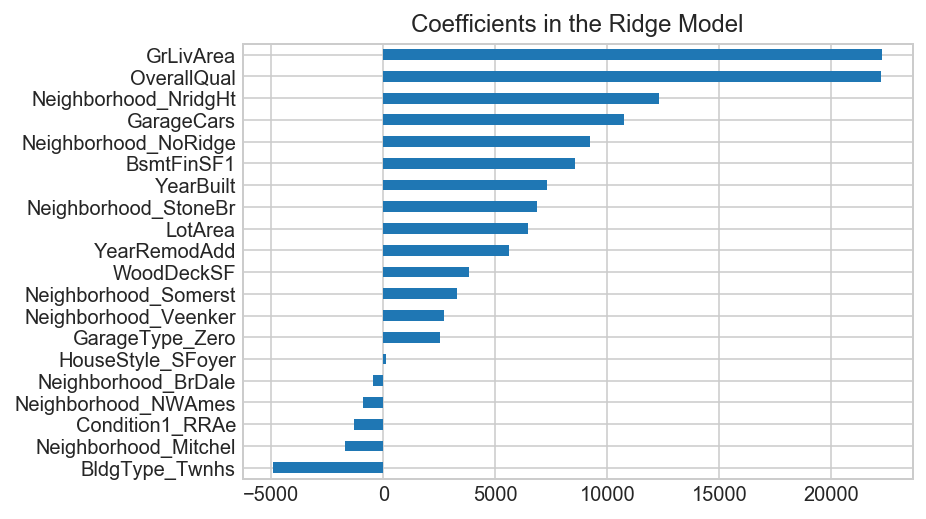

In [86]:
# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(x_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(x_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(x_train)
y_test_rdg = ridge.predict(x_test)


train_test(ridge, x_train, x_test, y_train, y_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = x_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()



('Best alpha :', 1.0)
Try again for more precision with alphas centered around 1.0
('Best alpha :', 1.3500000000000001)
('Lasso RMSE on Training set :', 33548.932703208193)
('Lasso RMSE on Test set :', 33260.418700957343)
Train
R2: 0.783049813951
Test
R2: 0.809685744569


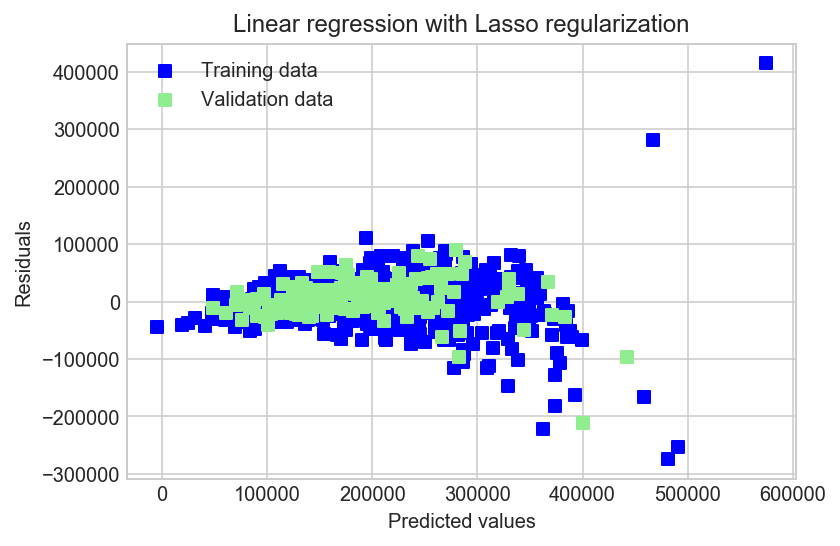

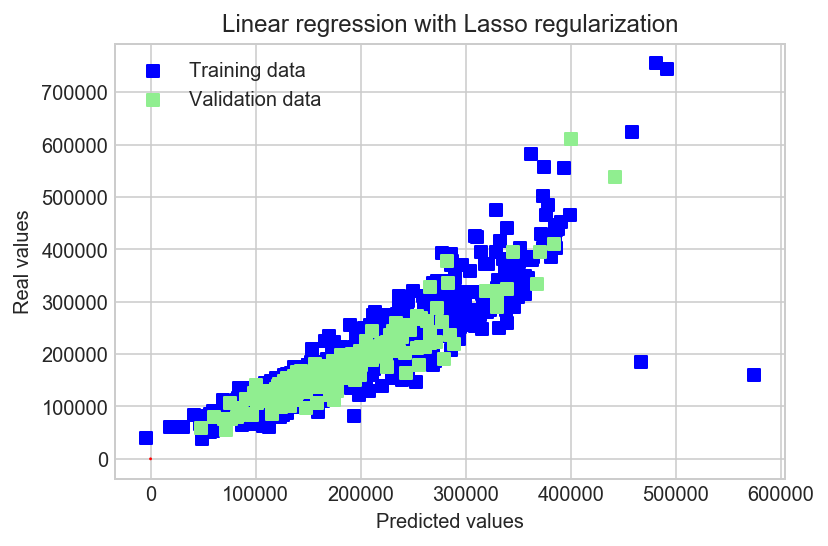

Lasso picked 21 features and eliminated the other 0 features


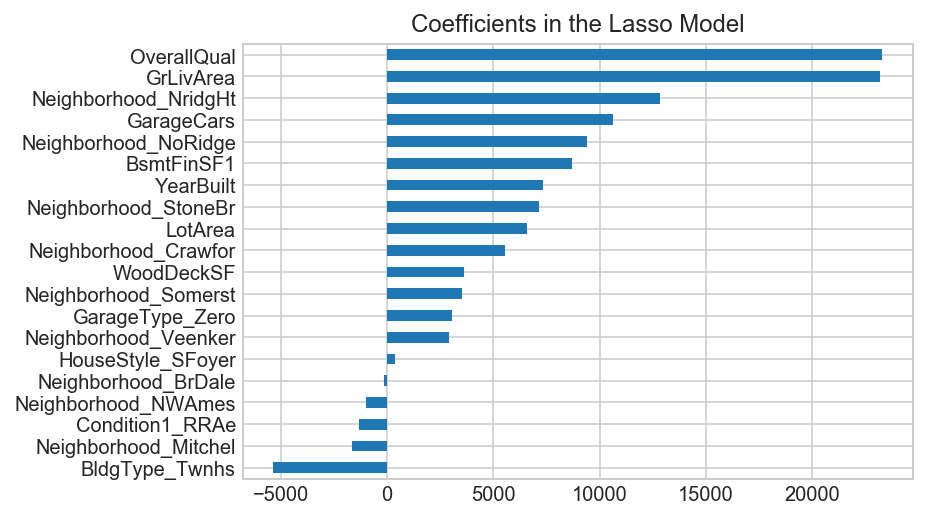

In [87]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(x_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(x_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(x_train)
y_test_las = lasso.predict(x_test)


train_test(lasso, x_train, x_test, y_train, y_test)


# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = x_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

('Best l1_ratio :', 0.29999999999999999)
('Best alpha :', 0.10000000000000001)
Try again for more precision with l1_ratio centered around 0.3
('Best l1_ratio :', 0.255)
('Best alpha :', 0.10000000000000001)
Now try again for more precision on alpha, with l1_ratio fixed at 0.255 and alpha centered around 0.1
('Best l1_ratio :', 0.255)
('Best alpha :', 0.10500000000000001)
('ElasticNet RMSE on Training set :', 33570.295659926007)
('ElasticNet RMSE on Test set :', 32293.005898329568)
Train
R2: 0.770139109869
Test
R2: 0.797091700355


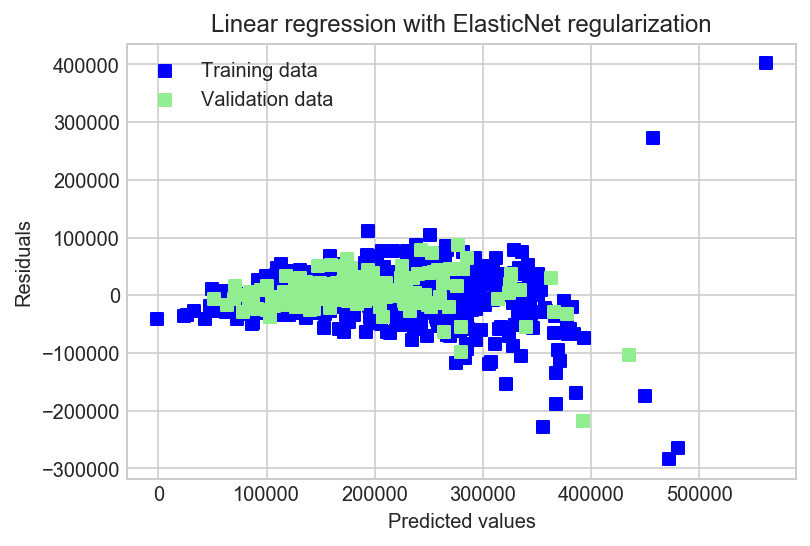

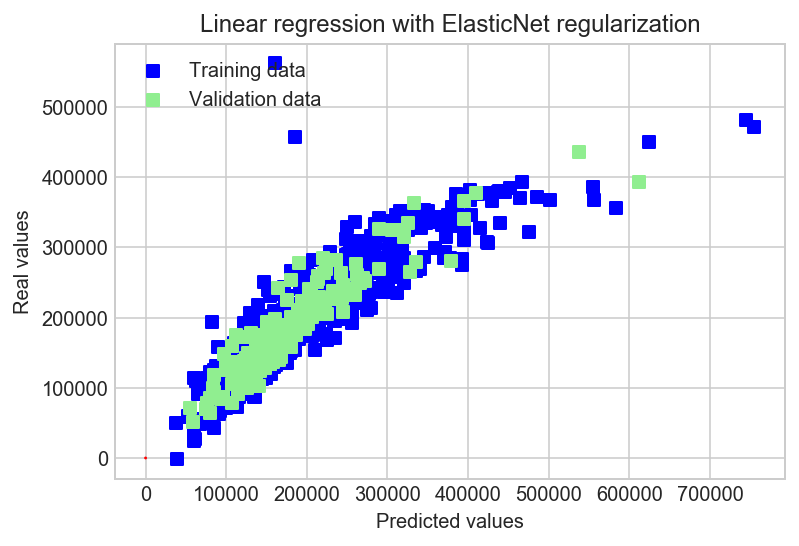

ElasticNet picked 21 features and eliminated the other 0 features


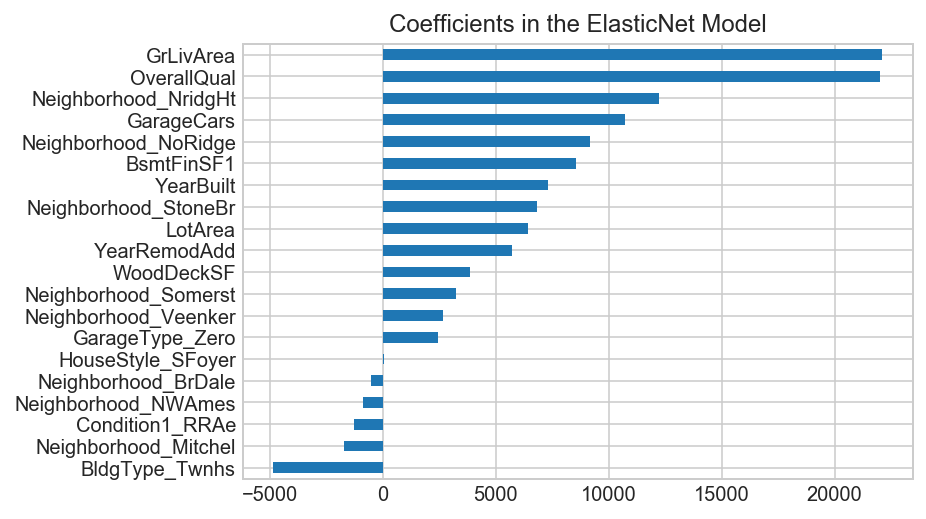

In [88]:
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(x_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(x_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(x_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(x_train)
y_test_ela = elasticNet.predict(x_test)

train_test(elasticNet, x_train, x_test, y_train, y_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = x_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

## SUMMARY FOR ALL REGRESSION AND REGULARIZATION USING Lasso columns result :/

In [98]:
###### R-Square Results for all types of 
print( "===========================================================================")
print( " all features : ")
print(train_test(lr.fit(x_train, y_train), x_train, x_test, y_train, y_test))
print( "===========================================================================")

print( "Ridge Regularization  :")      
print(train_test(ridge, x_train, x_test, y_train, y_test))
print( "===========================================================================")

print( "Lasso Regularization  : ") 
print(train_test(lasso, x_train, x_test, y_train, y_test))
print( "===========================================================================")

print( "ElasticNet Regularization   : ") 
print( train_test(elasticNet, x_train, x_test, y_train, y_test))
print( "===========================================================================")      

 all features : 
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Train
R2: 0.783065283652
Test
R2: 0.809704049494
None
Ridge Regularization  :
RidgeCV(alphas=[36.0, 39.0, 42.0, 45.0, 48.0, 51.0, 54.0, 57.0, 60.0, 63.0, 66.0, 69.0, 75.0, 78.0, 81.0, 84.0],
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)
Train
R2: 0.77233073881
Test
R2: 0.799243167565
None
Lasso Regularization  : 
LassoCV(alphas=[0.59999999999999998, 0.65000000000000002, 0.69999999999999996, 0.75, 0.80000000000000004, 0.84999999999999998, 0.90000000000000002, 0.94999999999999996, 1.0, 1.05, 1.1000000000000001, 1.1499999999999999, 1.25, 1.3, 1.3500000000000001, 1.3999999999999999],
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=50000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
Train
R2: 0.783049813951
Test
R2: 0.

From this regularization we found that all different regularization doesnt give much improvement to r2 original dataset after lasso feature seleection, this may been caused by lasso already consider penalty for increase in variables and somewhat feature selection and fine tuning phase slightly overlapped. 

While only gives very slight diffewrence, lasso regularization has better model., sp we will include lassoCV with best alpha 1.35 , and 
parameters as follow:  

   >  copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=50000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False

In [109]:
rlasso_columns

['Neighborhood_StoneBr',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'GrLivArea',
 'Neighborhood_Mitchel',
 'Neighborhood_Somerst',
 'Neighborhood_Veenker',
 'Neighborhood_Crawfor',
 'Condition1_RRAe',
 'BsmtFinSF1',
 'Neighborhood_BrDale',
 'YearRemodAdd',
 'YearBuilt',
 'OverallQual',
 'Neighborhood_NWAmes',
 'LotArea',
 'BldgType_Twnhs',
 'GarageCars',
 'WoodDeckSF',
 'GarageType_Zero',
 'HouseStyle_SFoyer']

## ANSWERING QUESTION NO.1
#### Develop an algorithm to reliably estimate the value of residential houses based on fixed characteristics.

By using randomized lasso for feature selection, and lasso regularization as fune tuning method, we reached out
R-square test 
  >Train
    R2: 0.783049813951
    Test
    R2: 0.809685744569 , 21 number of variables
    
   these are the list of predictor we used for fixed features
>['Neighborhood_StoneBr','Neighborhood_NoRidge', 'Neighborhood_NridgHt',
 'GrLivArea','Neighborhood_Mitchel', 'Neighborhood_Somerst','Neighborhood_Veenker',
 'Neighborhood_Crawfor','Condition1_RRAe','BsmtFinSF1','Neighborhood_BrDale',
 'YearRemodAdd','YearBuilt','OverallQual',
 'Neighborhood_NWAmes','LotArea',
 'BldgType_Twnhs','GarageCars','WoodDeckSF','GarageType_Zero','HouseStyle_SFoyer']

# Preparing to Explain the changable properties

In [164]:
fixed_feat_df  = fix[rlasso_columns]
fixed_feat_df .head()

Neighborhood_StoneBr  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     1                     0   

   GrLivArea  Neighborhood_Mitchel  Neighborhood_Somerst  \
0       1710                     0                     0   
1       1262                     0                     0   
2       1786                     0                     0   
3       1717                     0                     0   
4       2198                     0                     0   

   Neighborhood_Veenker  Neighborhood_Crawfor  Condition1_RRAe  BsmtFinSF1  \
0                     0                     0                0         706   
1                     1                     0                0         978   
2                     0                     0                0         486   
3                     0                     1                0         216   
4                     0                     0                0         655   

         ...          YearRemodAdd  YearBuilt  OverallQual  \
0        ...                  2003       2003            7   
1        ...                  1976       1976            6   
2        ...                  2002       2001            7   
3        ...                  1970       1915            7   
4        ...                  2000       2000            8   

   Neighborhood_NWAmes  LotArea  BldgType_Twnhs  GarageCars  WoodDeckSF  \
0                    0     8450               0           2           0   
1                    0     9600               0           2         298   
2                    0    11250               0           2           0   
3                    0     9550               0           3           0   
4                    0    14260               0           3         192   

   GarageType_Zero  HouseStyle_SFoyer  
0                0                  0  
1                0                  0  
2                0                  0  
3                0                  0  
4                0                  0  

[5 rows x 21 columns]

In [165]:
fixed_feat_df.to_csv("fixed_df.csv", sep='\t', encoding='utf-8')

In [166]:
renovatable_df.head()

OverallCond RoofMatl Exterior1st Exterior2nd MasVnrType  ExterQual  \
0            5  CompShg     VinylSd     VinylSd    BrkFace          2   
1            8  CompShg     MetalSd     MetalSd       None          3   
2            5  CompShg     VinylSd     VinylSd    BrkFace          2   
3            5  CompShg     Wd Sdng     Wd Shng       None          3   
4            5  CompShg     VinylSd     VinylSd    BrkFace          2   

   ExterCond Heating  HeatingQC  CentralAir Electrical  KitchenQual  \
0          4    GasA          0           1      SBrkr            2   
1          4    GasA          0           1      SBrkr            3   
2          4    GasA          0           1      SBrkr            2   
3          4    GasA          2           1      SBrkr            2   
4          4    GasA          0           1      SBrkr            2   

   Functional  Fireplaces  GarageQual  GarageCond  Utilities  SalePrice  
0           6           0           4           4          0     208500  
1           6           1           4           4          0     181500  
2           6           1           4           4          0     223500  
3           6           1           4           4          0     140000  
4           6           1           4           4          0     250000

In [167]:
renovatable_df.to_csv("renovatable_df.csv", sep='\t', encoding='utf-8')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

# 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?# A:

## Solution Approach

first I will run the model again to find the poredicted price, then find the differences between the predicted price and the real price. That price will become residual value that can be predicted using renovatable features.

this residual value will be the target variable for renovatable features, and we will make another model that predict the residual value. 

this way we can quantify the porediction made using renovatable features.

In [163]:
# Using previous best model to predict saleprice
import sklearn.linear_model
best_model = sklearn.linear_model.Lasso(alpha=13.5, copy_X=True, fit_intercept=True, max_iter=50000,
     normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001)
    
grid.fit(fixed_feat_df, renovatable_df.SalePrice)
grid.best_score_

0.81052082714899421

# Continued to Chapter 2..